In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150, dpi_save=600, vector_friendly=True)
sc.logging.print_versions()

rcParams['figure.figsize'] = 3,3

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.1 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
scratch_data_file = '/projects/ps-yeolab3/iachaim/10X/APOBEC/round2_RPS/results/RPS2/outs/'

adata_RPS2 = sc.read_10x_h5(scratch_data_file+'filtered_feature_bc_matrix.h5',gex_only=False)
adata_RPS2.var_names_make_unique()
adata_RPS2

reading /projects/ps-yeolab3/iachaim/10X/APOBEC/round2_RPS/results/RPS2/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


AnnData object with n_obs × n_vars = 11150 × 32739 
    var: 'gene_ids', 'feature_types', 'genome'

In [3]:
sc.pp.filter_cells(adata_RPS2, min_genes=1)
sc.pp.filter_genes(adata_RPS2, min_cells=1)

filtered out 9182 genes that are detectedin less than 1 cells


In [4]:
adata_RPS2.var

gene_ids    feature_types  \
RP11-34P13.7   ENSG00000238009  Gene Expression   
RP11-34P13.8   ENSG00000239945  Gene Expression   
AL627309.1     ENSG00000237683  Gene Expression   
AP006222.2     ENSG00000228463  Gene Expression   
RP4-669L17.10  ENSG00000237094  Gene Expression   
...                        ...              ...   
AL354822.1     ENSG00000215615  Gene Expression   
AL590523.1     ENSG00000268276  Gene Expression   
PNRC2-1        ENSG00000215700  Gene Expression   
SRSF10-1       ENSG00000215699  Gene Expression   
lenti_common      lenti_common  Gene Expression   

                                                   genome  n_cells  
RP11-34P13.7   refdata-cellranger-hg19_lenti_common-3.0.0       51  
RP11-34P13.8   refdata-cellranger-hg19_lenti_common-3.0.0        5  
AL627309.1     refdata-cellranger-hg19_lenti_common-3.0.0        3  
AP006222.2     refdata-cellranger-hg19_lenti_common-3.0.0     3963  
RP4-669L17.10  refdata-cellranger-hg19_lenti_common-3.0.0      120  
...                                                   ...      ...  
AL354822.1     refdata-cellranger-hg19_lenti_common-3.0.0      217  
AL590523.1     refdata-cellranger-hg19_lenti_common-3.0.0        7  
PNRC2-1        refdata-cellranger-hg19_lenti_common-3.0.0        5  
SRSF10-1       refdata-cellranger-hg19_lenti_common-3.0.0      201  
lenti_common   refdata-cellranger-hg19_lenti_common-3.0.0     6938  

[23557 rows x 4 columns]

In [5]:
adata_RPS2.obs

n_genes
AAACCCACAGGATCTT-1     5209
AAACCCACAGGTACGA-1     4466
AAACCCACAGTTCACA-1     4898
AAACCCACATCGGATT-1     4998
AAACCCAGTTCCGCAG-1     5601
...                     ...
TTTGTTGTCACTACTT-1     4205
TTTGTTGTCCCAGTGG-1     5012
TTTGTTGTCCCGTTCA-1     1378
TTTGTTGTCTACCACC-1     6401
TTTGTTGTCTGGAAGG-1     5578

[11150 rows x 1 columns]

In [6]:
adata_RPS2.var.loc[['lenti_common']]

gene_ids    feature_types  \
lenti_common  lenti_common  Gene Expression   

                                                  genome  n_cells  
lenti_common  refdata-cellranger-hg19_lenti_common-3.0.0     6938

In [7]:
adata_RPS2

AnnData object with n_obs × n_vars = 11150 × 23557 
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

# Subset to edits barcodes wanted #

In [8]:
subset=pd.read_csv('./results/edits_louvain_r0_5_by_barcode.csv',index_col=0)
subset

edits_louvain_r0_5
RPS2_possorted_genome_bam_MD-AAACCCACAGGATCTT-1...                   3
RPS2_possorted_genome_bam_MD-AAACCCACAGGTACGA-1...                   2
RPS2_possorted_genome_bam_MD-AAACCCAGTTCCGCAG-1...                   1
RPS2_possorted_genome_bam_MD-AAACCCATCCTAGCCT-1...                   1
RPS2_possorted_genome_bam_MD-AAACGAAAGGGATGTC-1...                   2
...                                                                ...
RPS2_possorted_genome_bam_MD-TTTGTTGCACTAGGCC-1...                   4
RPS2_possorted_genome_bam_MD-TTTGTTGCATAGGTAA-1...                   0
RPS2_possorted_genome_bam_MD-TTTGTTGCATATCGGT-1...                   1
RPS2_possorted_genome_bam_MD-TTTGTTGGTACACTCA-1...                   3
RPS2_possorted_genome_bam_MD-TTTGTTGTCACTACTT-1...                   1

[4024 rows x 1 columns]

In [9]:
subset=subset.reset_index()
subset['index']=subset['index'].str.replace('RPS2_possorted_genome_bam_MD-','')
subset['index']=subset['index'].str.replace('-RPS2-Edits','')
subset=subset.set_index('index', drop=True)
subset

edits_louvain_r0_5
index                                 
AAACCCACAGGATCTT-1                   3
AAACCCACAGGTACGA-1                   2
AAACCCAGTTCCGCAG-1                   1
AAACCCATCCTAGCCT-1                   1
AAACGAAAGGGATGTC-1                   2
...                                ...
TTTGTTGCACTAGGCC-1                   4
TTTGTTGCATAGGTAA-1                   0
TTTGTTGCATATCGGT-1                   1
TTTGTTGGTACACTCA-1                   3
TTTGTTGTCACTACTT-1                   1

[4024 rows x 1 columns]

In [10]:
barcodes_edits=subset.index.values.tolist()

In [11]:
adata_RPS2=adata_RPS2[barcodes_edits].copy()
adata_RPS2

AnnData object with n_obs × n_vars = 4024 × 23557 
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [12]:
#########

In [13]:
mito_genes = adata_RPS2.var_names.str.startswith('MT-')
adata_RPS2.obs['percent_mito'] = np.sum(
adata_RPS2[:, mito_genes].X, axis=1).A1 / np.sum(adata_RPS2.X, axis=1).A1
adata_RPS2.obs['n_counts'] = adata_RPS2.X.sum(axis=1).A1

In [14]:
adata_RPS2

AnnData object with n_obs × n_vars = 4024 × 23557 
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

... storing 'feature_types' as categorical
... storing 'genome' as categorical


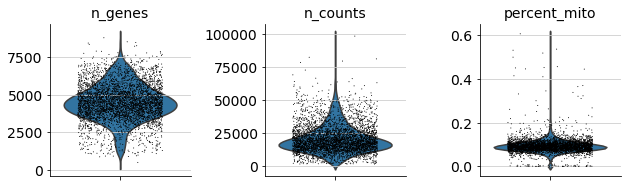

In [15]:
sc.pl.violin(adata_RPS2, ['n_genes', 'n_counts', 'percent_mito'],
                 jitter=0.3, multi_panel=True)

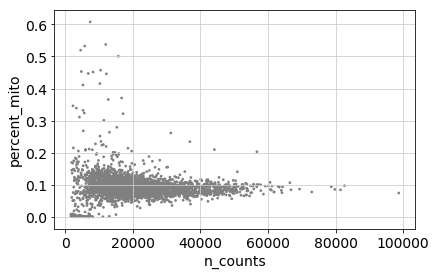

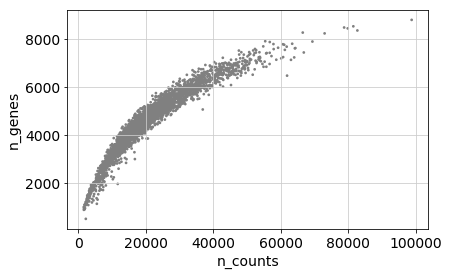

In [16]:
sc.pl.scatter(adata_RPS2, x='n_counts', y='percent_mito')
sc.pl.scatter(adata_RPS2, x='n_counts', y='n_genes')

In [17]:
adata_RPS2 = adata_RPS2[adata_RPS2.obs['n_genes'] < 7500, :]
adata_RPS2 = adata_RPS2[adata_RPS2.obs['n_genes'] > 1000, :]
adata_RPS2 = adata_RPS2[adata_RPS2.obs['n_counts'] < 60000, :]
adata_RPS2 = adata_RPS2[adata_RPS2.obs['percent_mito'] < 0.2, :]

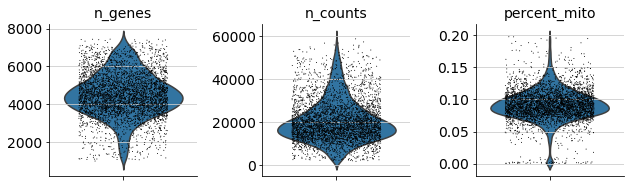

In [18]:
sc.pl.violin(adata_RPS2, ['n_genes', 'n_counts', 'percent_mito'],
                 jitter=0.3, multi_panel=True)

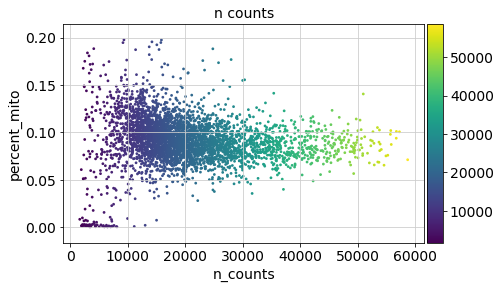

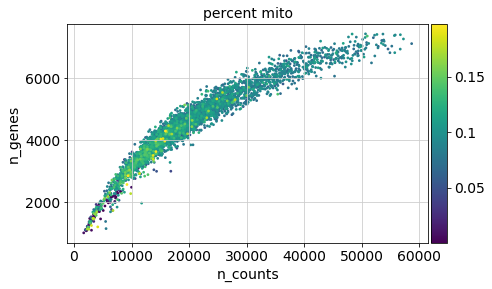

In [19]:
sc.pl.scatter(adata_RPS2, x='n_counts', y='percent_mito', color='n_counts')
sc.pl.scatter(adata_RPS2, x='n_counts', y='n_genes', color='percent_mito')

In [20]:
adata_RPS2

AnnData object with n_obs × n_vars = 3945 × 23557 
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


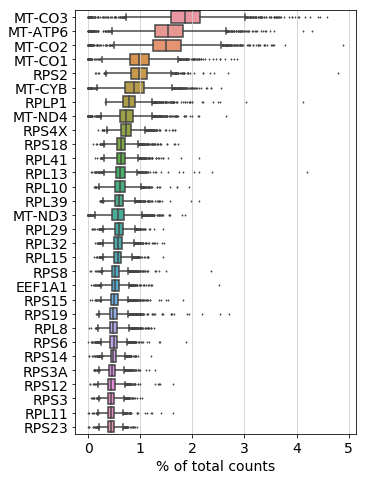

In [21]:
sc.pl.highest_expr_genes(adata_RPS2, n_top=30)

In [22]:
sc.pp.normalize_total(adata_RPS2, target_sum=1e4)
sc.pp.log1p(adata_RPS2)

adata_RPS2_original=adata_RPS2
gene_list_to_remove = np.in1d(adata_RPS2.var_names, ['lenti_common'])
adata_RPS2=adata_RPS2[:, ~gene_list_to_remove].copy()

Normalizing counts per cell.
    finished (0:00:00):normalized adata.X


In [23]:
adata_RPS2.raw = adata_RPS2

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


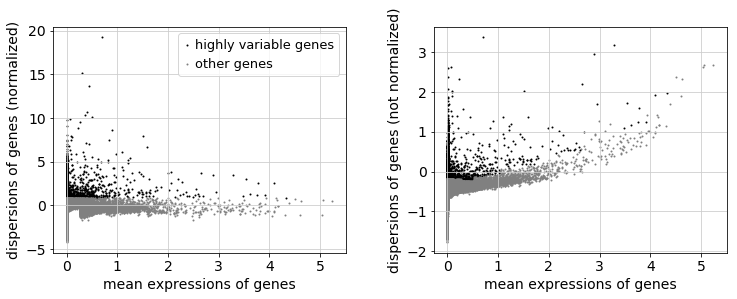

In [24]:
sc.pp.highly_variable_genes(adata_RPS2, n_top_genes=2000)
sc.pl.highly_variable_genes(adata_RPS2)
adata_RPS2 = adata_RPS2[:, adata_RPS2.var.highly_variable]

In [25]:
#print(np.any(adata_RPS2.X.sum(axis=0) == 0))
#print(np.any(adata_RPS2.X.sum(axis=1) == 0))

In [26]:
#adata_RPS2 = adata_RPS2[:,adata_RPS2.X.sum(axis=0) > 0].copy()

In [27]:
adata_RPS2

View of AnnData object with n_obs × n_vars = 3945 × 2000 
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [28]:
sc.pp.regress_out(adata_RPS2, ['n_counts', 'percent_mito'])
sc.pp.scale(adata_RPS2, max_value=10)

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:10)


computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:00)


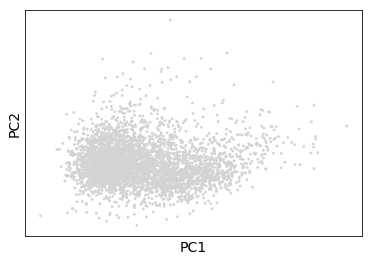

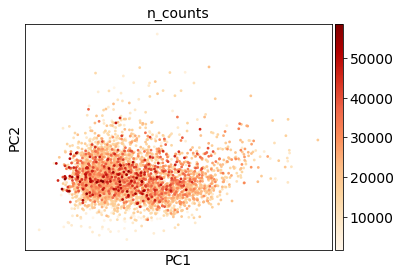

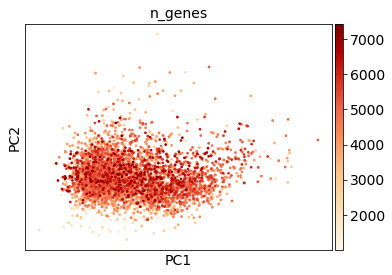

In [29]:
sc.tl.pca(adata_RPS2, svd_solver='arpack')
sc.pl.pca(adata_RPS2)
sc.pl.pca(adata_RPS2, color='n_counts',cmap='OrRd')
sc.pl.pca(adata_RPS2, color='n_genes',cmap='OrRd')

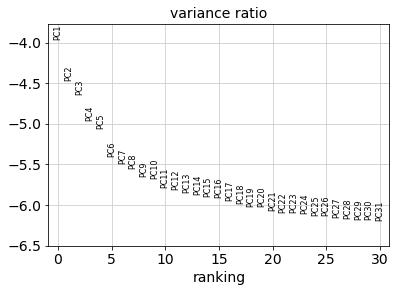

In [30]:
sc.pl.pca_variance_ratio(adata_RPS2, log=True)

In [31]:
sc.pp.neighbors(adata_RPS2, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


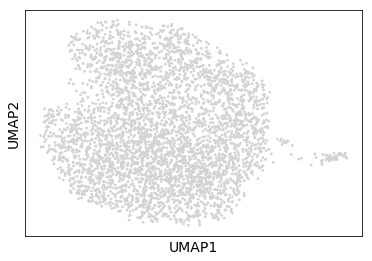

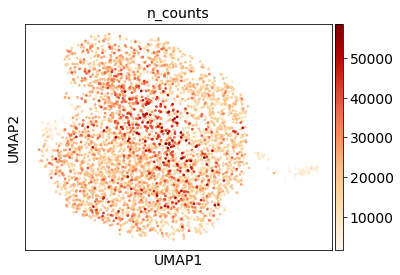

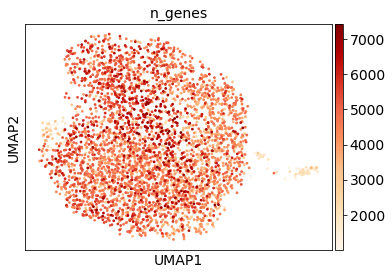

In [32]:
sc.tl.umap(adata_RPS2)
sc.pl.umap(adata_RPS2)
sc.pl.umap(adata_RPS2, color='n_counts',cmap='OrRd')
sc.pl.umap(adata_RPS2, color='n_genes',cmap='OrRd')

In [33]:
adata_RPS2.var

gene_ids    feature_types  \
AL627309.1  ENSG00000237683  Gene Expression   
FAM87B      ENSG00000177757  Gene Expression   
SAMD11      ENSG00000187634  Gene Expression   
HES4        ENSG00000188290  Gene Expression   
ISG15       ENSG00000187608  Gene Expression   
...                     ...              ...   
MT-ND3      ENSG00000198840  Gene Expression   
MT-ND4L     ENSG00000212907  Gene Expression   
MT-ND4      ENSG00000198886  Gene Expression   
MT-ND5      ENSG00000198786  Gene Expression   
MT-ND6      ENSG00000198695  Gene Expression   

                                                genome  n_cells  \
AL627309.1  refdata-cellranger-hg19_lenti_common-3.0.0        3   
FAM87B      refdata-cellranger-hg19_lenti_common-3.0.0       12   
SAMD11      refdata-cellranger-hg19_lenti_common-3.0.0     6757   
HES4        refdata-cellranger-hg19_lenti_common-3.0.0    10539   
ISG15       refdata-cellranger-hg19_lenti_common-3.0.0     2323   
...                                                ...      ...   
MT-ND3      refdata-cellranger-hg19_lenti_common-3.0.0    10925   
MT-ND4L     refdata-cellranger-hg19_lenti_common-3.0.0    10258   
MT-ND4      refdata-cellranger-hg19_lenti_common-3.0.0    10926   
MT-ND5      refdata-cellranger-hg19_lenti_common-3.0.0    10795   
MT-ND6      refdata-cellranger-hg19_lenti_common-3.0.0    10654   

            highly_variable     means  dispersions  dispersions_norm  
AL627309.1             True  0.000230    -0.097580          1.139787  
FAM87B                 True  0.001134     0.098328          1.766351  
SAMD11                 True  0.478322    -0.197587          1.136034  
HES4                   True  1.759045     0.403504          2.091746  
ISG15                  True  0.123881    -0.058221          1.265667  
...                     ...       ...          ...               ...  
MT-ND3                 True  4.092678     1.920991          2.583951  
MT-ND4L                True  1.221021     0.297847          1.789620  
MT-ND4                 True  4.320953     1.973369          0.872743  
MT-ND5                 True  2.697492     0.991684          1.124305  
MT-ND6                 True  1.991240     1.089174          3.686102  

[2000 rows x 8 columns]

# Louvain Clustering on Gene Expression #

In [34]:
sc.tl.louvain(adata_RPS2)
sc.tl.louvain(adata_RPS2, resolution=0.8, key_added='louvain_r08')
sc.tl.louvain(adata_RPS2, resolution=0.5, key_added='louvain_r0.5')
sc.tl.louvain(adata_RPS2, resolution=0.2, key_added='louvain_r0.2')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain_r08', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain_r0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 3 clusters and added
    'louvain_r0.2', the cluster labels (adata.obs, categorical) (0:00:00)


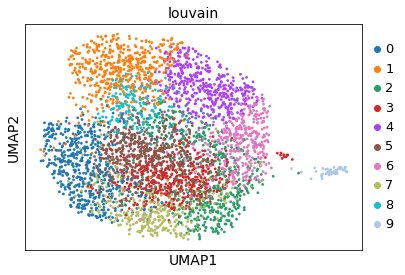

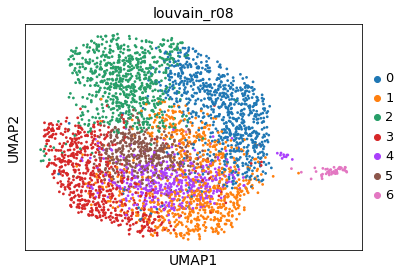

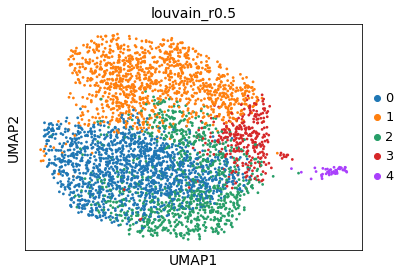

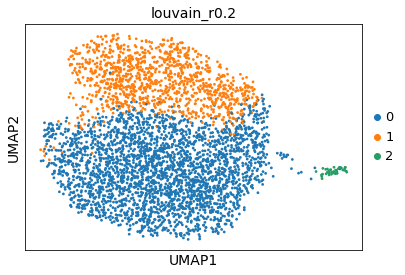

In [35]:
sc.pl.umap(adata_RPS2, color=['louvain'])
sc.pl.umap(adata_RPS2, color=['louvain_r08'])
sc.pl.umap(adata_RPS2, color=['louvain_r0.5'])
sc.pl.umap(adata_RPS2, color=['louvain_r0.2'])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


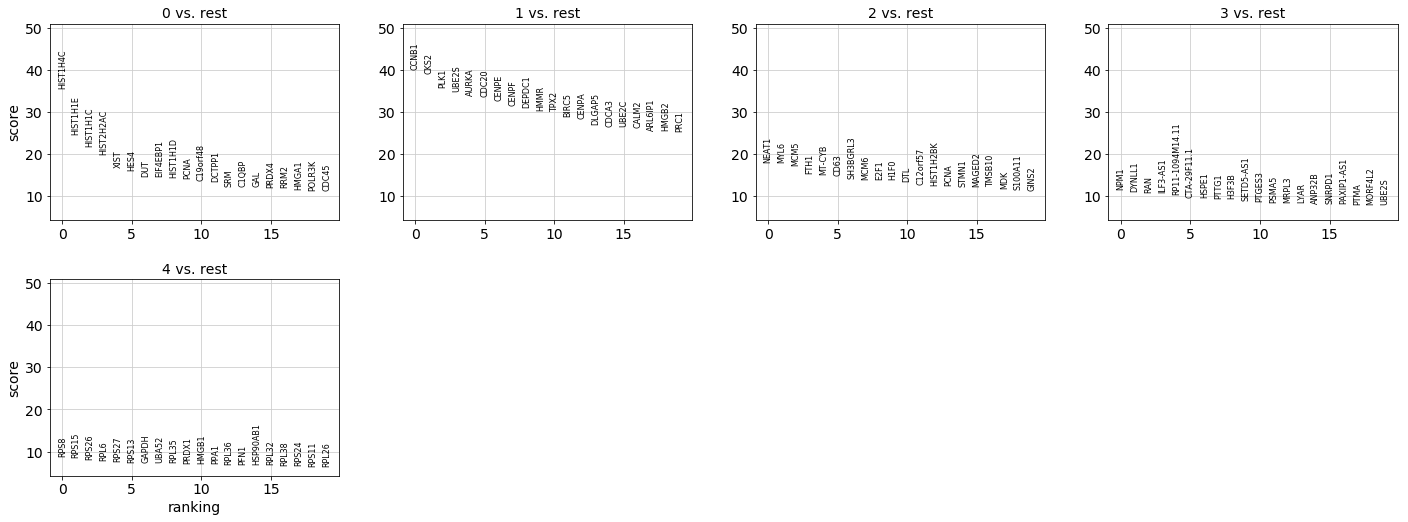

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_r0.5']`


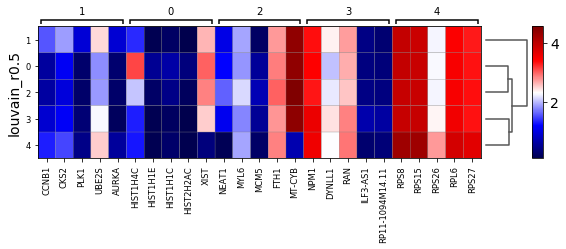

In [48]:
sc.tl.rank_genes_groups(adata_RPS2, 'louvain_r0.5', method='wilcoxon',n_genes=100)
sc.pl.rank_genes_groups(adata_RPS2, n_genes=20)
#sc.pl.rank_genes_groups_violin(adata_RPS2, n_genes=10)
sc.pl.rank_genes_groups_matrixplot(adata_RPS2, n_genes=5, cmap='seismic')

In [49]:
result = adata_RPS2.uns['rank_genes_groups']
groups = result['names'].dtype.names
result=pd.DataFrame(
    {group + '_' + key[:]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges','pvals','pvals_adj']})
result

0_names  0_logfoldchanges        0_pvals    0_pvals_adj 1_names  \
0    HIST1H4C          2.455016  2.451295e-275  5.774270e-271   CCNB1   
1    HIST1H1E          2.084063  7.882088e-135  6.189016e-131    CKS2   
2    HIST1H1C          1.398203  5.341488e-104  1.797487e-100    PLK1   
3   HIST2H2AC          1.956730   1.020339e-88   2.670568e-85   UBE2S   
4        XIST          0.536776   6.826411e-64   1.005018e-60   AURKA   
..        ...               ...            ...            ...     ...   
95   HIST1H3B          1.800827   1.221017e-14   1.639026e-12   KIFC1   
96    HNRNPAB          0.179484   1.224608e-14   1.639026e-12    MTDH   
97     FAM84B          0.668520   2.849182e-14   3.647572e-12  ANP32E   
98     MRPS25          0.289812   3.385349e-14   4.310556e-12   RBM8A   
99  HIST1H2AM          1.749386   3.745139e-14   4.743037e-12   RNF26   

    1_logfoldchanges        1_pvals    1_pvals_adj 2_names  2_logfoldchanges  \
0           2.088700   0.000000e+00   0.000000e+00   NEAT1          1.005902   
1           1.542262   0.000000e+00   0.000000e+00    MYL6          0.467497   
2           2.333406  3.161698e-280  2.482565e-276    MCM5          1.053528   
3           0.965189  5.282763e-265  3.111019e-261    FTH1          0.280616   
4           2.367792  6.667827e-253  3.141347e-249  MT-CYB          0.309595   
..               ...            ...            ...     ...               ...   
95          1.123409   1.452824e-30   2.462503e-28    MCM2          0.457009   
96          0.323192   1.453082e-30   2.462503e-28   BRCA1          0.466135   
97          0.480088   2.245453e-30   3.746036e-28   MYL6B          0.310895   
98          0.276007   2.258181e-30   3.746036e-28     UNG          0.486175   
99          0.833853   6.580720e-30   1.076496e-27   ASF1B          0.462986   

         2_pvals   2_pvals_adj          3_names  3_logfoldchanges  \
0   4.522111e-73  5.326142e-69             NPM1          0.316432   
1   8.367957e-72  6.570520e-68           DYNLL1          0.385704   
2   1.326166e-67  7.809791e-64              RAN          0.304747   
3   2.749604e-53  6.476967e-50         ILF3-AS1          0.977891   
4   6.662257e-51  1.307801e-47  RP11-1094M14.11          1.006979   
..           ...           ...              ...               ...   
95  1.266164e-14  1.151574e-12             EID1          0.317222   
96  1.362899e-14  1.230056e-12    RP11-752G15.6          0.638357   
97  1.510570e-14  1.347841e-12            PA2G4          0.254846   
98  1.757871e-14  1.556707e-12           STARD7          0.377336   
99  2.757438e-14  2.410006e-12            HMGB1          0.182417   

         3_pvals   3_pvals_adj 4_names  4_logfoldchanges       4_pvals  \
0   2.228961e-31  1.074945e-27    RPS8          0.496043  1.812921e-18   
1   3.031548e-28  7.934573e-25   RPS15          0.533234  4.866343e-18   
2   5.406431e-27  1.134603e-23   RPS26          0.761259  8.347802e-16   
3   7.121314e-27  1.290382e-23    RPL6          0.479330  4.222683e-15   
4   7.165750e-25  1.125309e-21   RPS27          0.492895  2.374422e-14   
..           ...           ...     ...               ...           ...   
95  1.807133e-08  2.546982e-06  RPL10A          0.303840  1.237125e-05   
96  2.517674e-08  3.460517e-06   ATP5I          0.323163  1.536881e-05   
97  2.526782e-08  3.460517e-06   HMGB3          0.663106  1.549501e-05   
98  2.555068e-08  3.479027e-06   HSPD1          0.316262  1.780794e-05   
99  2.681765e-08  3.548970e-06   ATP5H          0.668984  2.125803e-05   

     4_pvals_adj  
0   1.492946e-15  
1   3.697793e-15  
2   4.274801e-13  
3   1.842028e-12  
4   8.225276e-12  
..           ...  
95  2.637260e-04  
96  3.131727e-04  
97  3.149270e-04  
98  3.519271e-04  
99  4.077802e-04  

[100 rows x 20 columns]

Filtering genes using: min_in_group_fraction: 0.0001 min_fold_change: 1, max_out_group_fraction: 0.75


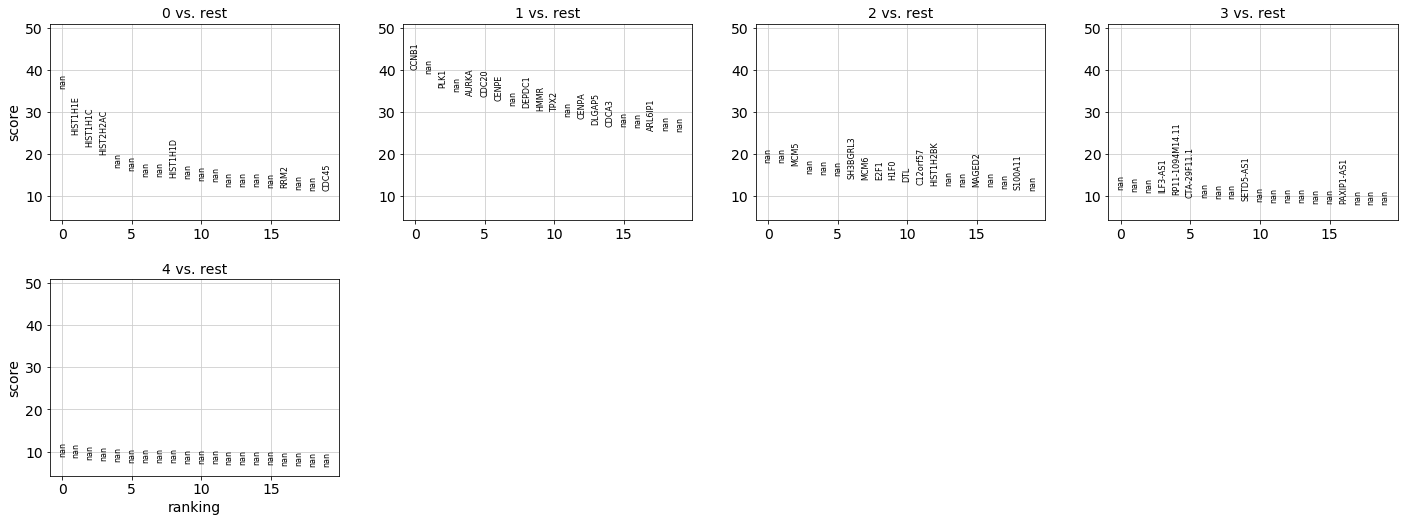

categories: 0, 1, 2, etc.
var_group_labels: 0, 1, 2, etc.


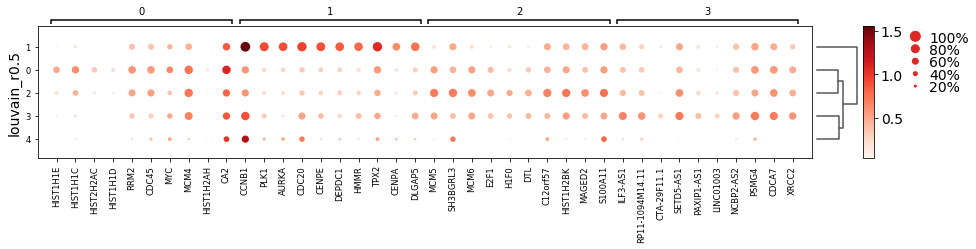

categories: 0, 1, 2, etc.
var_group_labels: 0, 1, 2, etc.


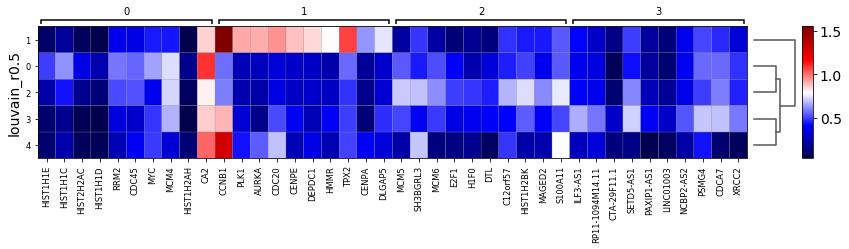

In [50]:
sc.tl.filter_rank_genes_groups(adata_RPS2,min_in_group_fraction=0.0001, min_fold_change=1, max_out_group_fraction=0.75)
# visualize results
sc.pl.rank_genes_groups(adata_RPS2, key='rank_genes_groups_filtered')
# visualize results using dotplot
sc.pl.rank_genes_groups_dotplot(adata_RPS2, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_matrixplot(adata_RPS2, key='rank_genes_groups_filtered',cmap='seismic')

# Standard Macosko Cell Cycle Analysis #

In [57]:
cc_genes_file = '../Cell_Cycle_Tables/Macosko_cell_cycle_genes.csv'

#Score cell cycle and visualize the effect:
cc_genes = pd.read_csv(cc_genes_file)
s_genes = cc_genes['S'].dropna()
g2m_genes = cc_genes['G2M'].dropna()

#s_genes_mm = [gene.lower().capitalize() for gene in s_genes]
#g2m_genes_mm = [gene.lower().capitalize() for gene in g2m_genes]

s_genes_mm_ens = adata_RPS2.var_names[np.in1d(adata_RPS2.var_names, s_genes)]
g2m_genes_mm_ens = adata_RPS2.var_names[np.in1d(adata_RPS2.var_names, g2m_genes)]

sc.tl.score_genes_cell_cycle(adata_RPS2, s_genes=s_genes_mm_ens, g2m_genes=g2m_genes_mm_ens)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs) (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs) (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


... storing 'phase' as categorical


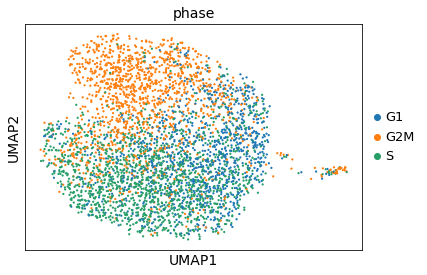

In [58]:
sc.pl.umap(adata_RPS2, color=['phase'],size=20)

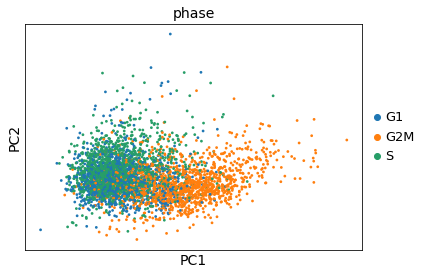

In [59]:
sc.pl.pca(adata_RPS2, color='phase')

In [60]:
adata_RPS2.obs

n_genes  percent_mito  n_counts louvain louvain_r08  \
AAACCCACAGGATCTT-1     5209      0.061472   23523.0       2           1   
AAACCCACAGGTACGA-1     4466      0.093381   19458.0       4           0   
AAACCCAGTTCCGCAG-1     5601      0.057334   28831.0       4           0   
AAACCCATCCTAGCCT-1     6326      0.080142   34314.0       4           0   
AAACGAAAGGGATGTC-1     4588      0.093182   19800.0       4           0   
...                     ...           ...       ...     ...         ...   
TTTGTTGCACTAGGCC-1     2846      0.135862    7618.0       7           1   
TTTGTTGCATAGGTAA-1     3940      0.107398   15680.0       5           5   
TTTGTTGCATATCGGT-1     5075      0.085707   24117.0       6           0   
TTTGTTGGTACACTCA-1     6576      0.075234   41271.0       5           5   
TTTGTTGTCACTACTT-1     4205      0.059861   15987.0       0           3   

                   louvain_r0.5 louvain_r0.2 __is_in_cluster__   S_score  \
AAACCCACAGGATCTT-1            2            0             False  0.149611   
AAACCCACAGGTACGA-1            1            1             False -0.261797   
AAACCCAGTTCCGCAG-1            1            1             False -0.542382   
AAACCCATCCTAGCCT-1            1            1             False -0.268141   
AAACGAAAGGGATGTC-1            1            1             False -0.579929   
...                         ...          ...               ...       ...   
TTTGTTGCACTAGGCC-1            2            0             False  0.158736   
TTTGTTGCATAGGTAA-1            0            0             False  0.490716   
TTTGTTGCATATCGGT-1            3            1             False -0.059076   
TTTGTTGGTACACTCA-1            2            0             False  0.146324   
TTTGTTGTCACTACTT-1            0            0             False  0.089026   

                    G2M_score phase  
AAACCCACAGGATCTT-1   0.236577   G2M  
AAACCCACAGGTACGA-1  -0.127787    G1  
AAACCCAGTTCCGCAG-1   0.260813   G2M  
AAACCCATCCTAGCCT-1  -0.097441    G1  
AAACGAAAGGGATGTC-1   0.028566   G2M  
...                       ...   ...  
TTTGTTGCACTAGGCC-1  -0.402856     S  
TTTGTTGCATAGGTAA-1  -0.062239     S  
TTTGTTGCATATCGGT-1  -0.254719    G1  
TTTGTTGGTACACTCA-1   0.024494     S  
TTTGTTGTCACTACTT-1   0.087607     S  

[3945 rows x 11 columns]

In [61]:
adata_RPS2.obs['phase']

AAACCCACAGGATCTT-1    G2M
AAACCCACAGGTACGA-1     G1
AAACCCAGTTCCGCAG-1    G2M
AAACCCATCCTAGCCT-1     G1
AAACGAAAGGGATGTC-1    G2M
                     ... 
TTTGTTGCACTAGGCC-1      S
TTTGTTGCATAGGTAA-1      S
TTTGTTGCATATCGGT-1     G1
TTTGTTGGTACACTCA-1      S
TTTGTTGTCACTACTT-1      S
Name: phase, Length: 3945, dtype: category
Categories (3, object): [G1, G2M, S]

In [62]:
adata_RPS2.obs['phase'].value_counts()

S      1550
G2M    1358
G1     1037
Name: phase, dtype: int64

In [63]:
#by_phase=adata_RPS2_original[:,['lenti_common']].to_df()
by_phase=adata_RPS2.obs[['phase']]
by_phase['S_score']=adata_RPS2.obs['S_score']
by_phase['G2M_score']=adata_RPS2.obs['G2M_score']
#by_phase.rename(columns={"lenti_common":"RPS2_ORF"},inplace=True)
by_phase

/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


phase   S_score  G2M_score
AAACCCACAGGATCTT-1   G2M  0.149611   0.236577
AAACCCACAGGTACGA-1    G1 -0.261797  -0.127787
AAACCCAGTTCCGCAG-1   G2M -0.542382   0.260813
AAACCCATCCTAGCCT-1    G1 -0.268141  -0.097441
AAACGAAAGGGATGTC-1   G2M -0.579929   0.028566
...                  ...       ...        ...
TTTGTTGCACTAGGCC-1     S  0.158736  -0.402856
TTTGTTGCATAGGTAA-1     S  0.490716  -0.062239
TTTGTTGCATATCGGT-1    G1 -0.059076  -0.254719
TTTGTTGGTACACTCA-1     S  0.146324   0.024494
TTTGTTGTCACTACTT-1     S  0.089026   0.087607

[3945 rows x 3 columns]

In [66]:
adata_RPS2

AnnData object with n_obs × n_vars = 3945 × 2000 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'louvain_r08', 'louvain_r0.5', 'louvain_r0.2', '__is_in_cluster__', 'S_score', 'G2M_score', 'phase'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'louvain_r08_colors', 'louvain_r0.5_colors', 'louvain_r0.2_colors', 'rank_genes_groups', 'dendrogram_louvain', 'rank_genes_groups_filtered', 'dendrogram_louvain_r0.5', 'phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [67]:
sc.tl.dendrogram(adata_RPS2,groupby='phase',var_names=all_genes)

Storing dendrogram info using `.uns['dendrogram_phase']`


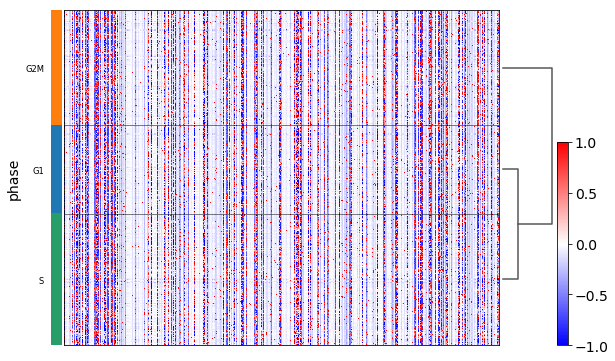

GridSpec(2, 4, height_ratios=[0, 6], width_ratios=[0.2, 8, 1, 0.2])

In [68]:
all_genes=list(adata_RPS2.var.index)
sc.pl.heatmap(adata_RPS2, var_names=all_genes ,groupby='phase', cmap='bwr', use_raw=False, vmin=-1, vmax=1, dendrogram=True)

## Saving top 100 cells for each Macosko Cell Cycle (G1/S/G2M) ##

In [44]:
test=by_phase
test2=test[test['phase']=='G2M']
test3=test2[test2['S_score']<0].sort_values(by='G2M_score', ascending=False)
print(len(test3))
print(test3.head(100))
#test3.head(100).to_csv('/projects/ps-yeolab3/iachaim/10X/APOBEC/to_share/RPS2_G2M_Macosko_top100_normalized_counts.csv')

1002
                   phase   S_score  G2M_score
CTTCTAAAGAGTCCGA-1   G2M -0.338065   1.494291
TTCCGGTTCATGAGAA-1   G2M -0.054140   1.390817
TTTCATGTCTCAGGCG-1   G2M -0.741239   1.227728
CAACAGTTCTGCCTCA-1   G2M -0.281807   1.116470
GAGTTTGCACCTGCAG-1   G2M -0.125884   1.100338
...                  ...       ...        ...
TCGCACTGTATTGAGA-1   G2M -0.311694   0.680808
CACAACATCTCAACCC-1   G2M -0.220608   0.675041
GTGGCGTGTTGTAGCT-1   G2M -0.267664   0.673548
TTTACGTGTGTCTTAG-1   G2M -0.252310   0.673035
ACCCTTGTCCATACAG-1   G2M -0.137192   0.669718

[100 rows x 3 columns]


In [45]:
test=by_phase
test2=test[test['phase']=='S']
test3=test2[test2['G2M_score']<0].sort_values(by='S_score', ascending=False)
print(len(test3))
print(test3.head(100))
#test3.head(100).to_csv('/projects/ps-yeolab3/iachaim/10X/APOBEC/to_share/RPS2_S_Macosko_top100_normalized_counts.csv')

1198
                   phase   S_score  G2M_score
TCATTGTCAATGTCTG-1     S  1.661547  -0.976496
TTGTTTGAGGACTTCT-1     S  1.385909  -0.480827
ACATCCCTCTGGGTCG-1     S  1.247296  -0.151434
TCCGAAAGTTGCATAC-1     S  1.138218  -0.102640
ACACTGATCCTCTAGC-1     S  1.080148  -0.056991
...                  ...       ...        ...
TACATTCCAACAAAGT-1     S  0.541389  -0.199289
ACTGATGTCACATTGG-1     S  0.541280  -0.371685
TCTATACCAGGTGTGA-1     S  0.541237  -0.039352
ATCGATGAGATCCGAG-1     S  0.538516  -0.358749
AGGATCTCAGTCTACA-1     S  0.535062  -0.192726

[100 rows x 3 columns]


In [46]:
test=by_phase
test2=test[test['phase']=='G1']
sum_column=test2['S_score']+test2['G2M_score']
test2['sum']=sum_column
test2.sort_values(by='sum', inplace=True)
print(len(test2))
print(test2.head(100))
#test3.head(100).to_csv('/projects/ps-yeolab3/iachaim/10X/APOBEC/to_share/RPS2_G1_Macosko_top100_normalized_counts.csv')

1004
                   phase   S_score  G2M_score       sum
AATCGTGCAGAAGCGT-1    G1 -0.706455  -1.011059 -1.717514
GGGATGATCCTGCTAC-1    G1 -0.961076  -0.454151 -1.415227
CAGGCCAGTGAGTAAT-1    G1 -0.891083  -0.513877 -1.404960
GCACATATCTCTGCTG-1    G1 -1.083156  -0.289761 -1.372917
CAGCCAGAGCCTCACG-1    G1 -0.431572  -0.769983 -1.201555
...                  ...       ...        ...       ...
ACGCACGCATTAAGCC-1    G1 -0.182420  -0.562101 -0.744522
GGGACTCAGTCCTGTA-1    G1 -0.202947  -0.539647 -0.742594
GTCGTAAAGATCCAAA-1    G1 -0.693530  -0.046574 -0.740104
CAATACGCAACCGACC-1    G1 -0.377722  -0.361401 -0.739123
CACTAAGCATAGCTGT-1    G1 -0.433958  -0.300868 -0.734826

[100 rows x 4 columns]


/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Alternative Cell Cycle Analysis ##

In [47]:
cc_genes_file = '../Cell_Cycle_Tables/Macosko_cell_cycle_genes.csv'

#Score cell cycle and visualize the effect:
cc_genes = pd.read_csv(cc_genes_file)
cc_genes.head()

IG1.S         S       G2M        M    M.G1
0      ACD     ABCC5      ANLN     AHI1   AGFG1
1    ACYP1    ABHD10     AP3D1  AKIRIN2  AGPAT3
2  ADAMTS1  ANKRD18A  ARHGAP19  ANKRD40  AKAP13
3  ANKRD10     ASF1B     ARL4A     ANLN    AMD1
4    APEX2     ATAD2     ARMC1   ANP32B  ANP32E

In [48]:
cc_genes_file = '../Cell_Cycle_Tables/Macosko_cell_cycle_genes.csv'

#Score cell cycle and visualize the effect:
cc_genes = pd.read_csv(cc_genes_file)
ig1s_genes = cc_genes['IG1.S'].dropna()
s_genes = cc_genes['S'].dropna()
g2m_genes = cc_genes['G2M'].dropna()
m_genes = cc_genes['M'].dropna()
mg1_genes = cc_genes['M.G1'].dropna()

#s_genes_mm = [gene.lower().capitalize() for gene in s_genes]
#g2m_genes_mm = [gene.lower().capitalize() for gene in g2m_genes]

ig1s_genes_mm_ens = adata_RPS2.var_names[np.in1d(adata_RPS2.var_names, ig1s_genes)]
s_genes_mm_ens = adata_RPS2.var_names[np.in1d(adata_RPS2.var_names, s_genes)]
g2m_genes_mm_ens = adata_RPS2.var_names[np.in1d(adata_RPS2.var_names, g2m_genes)]
m_genes_mm_ens = adata_RPS2.var_names[np.in1d(adata_RPS2.var_names, m_genes)]
mg1_genes_mm_ens = adata_RPS2.var_names[np.in1d(adata_RPS2.var_names, mg1_genes)]

In [49]:
sc.tl.score_genes(adata_RPS2,ig1s_genes_mm_ens,score_name='Macosko_IG1.S_Score')
sc.tl.score_genes(adata_RPS2,s_genes_mm_ens,score_name='Macosko_S_Score')
sc.tl.score_genes(adata_RPS2,g2m_genes_mm_ens,score_name='Macosko_G2M_Score')
sc.tl.score_genes(adata_RPS2,m_genes_mm_ens,score_name='Macosko_M_Score')
sc.tl.score_genes(adata_RPS2,mg1_genes_mm_ens,score_name='Macosko_M.G1_Score')

computing score 'Macosko_IG1.S_Score'
    finished: added
    'Macosko_IG1.S_Score', score of gene set (adata.obs) (0:00:00)
computing score 'Macosko_S_Score'
    finished: added
    'Macosko_S_Score', score of gene set (adata.obs) (0:00:00)
computing score 'Macosko_G2M_Score'
    finished: added
    'Macosko_G2M_Score', score of gene set (adata.obs) (0:00:00)
computing score 'Macosko_M_Score'
    finished: added
    'Macosko_M_Score', score of gene set (adata.obs) (0:00:00)
computing score 'Macosko_M.G1_Score'
    finished: added
    'Macosko_M.G1_Score', score of gene set (adata.obs) (0:00:00)


In [50]:
adata_RPS2

AnnData object with n_obs × n_vars = 3945 × 2000 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'louvain_r0.5', 'louvain_r0.2', 'S_score', 'G2M_score', 'phase', 'Macosko_IG1.S_Score', 'Macosko_S_Score', 'Macosko_G2M_Score', 'Macosko_M_Score', 'Macosko_M.G1_Score'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'louvain_r0.5_colors', 'louvain_r0.2_colors', 'rank_genes_groups', 'dendrogram_louvain', 'phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

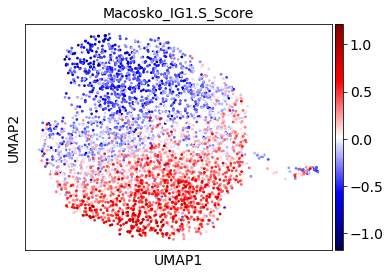

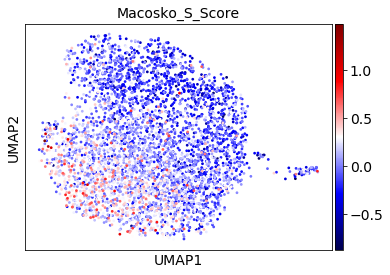

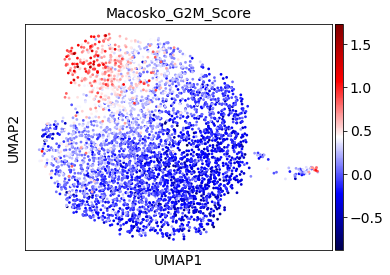

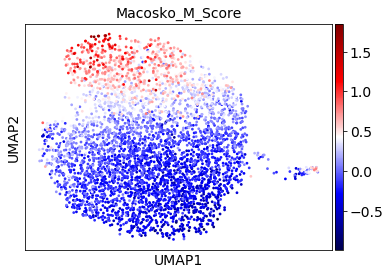

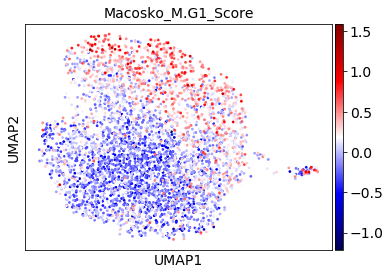

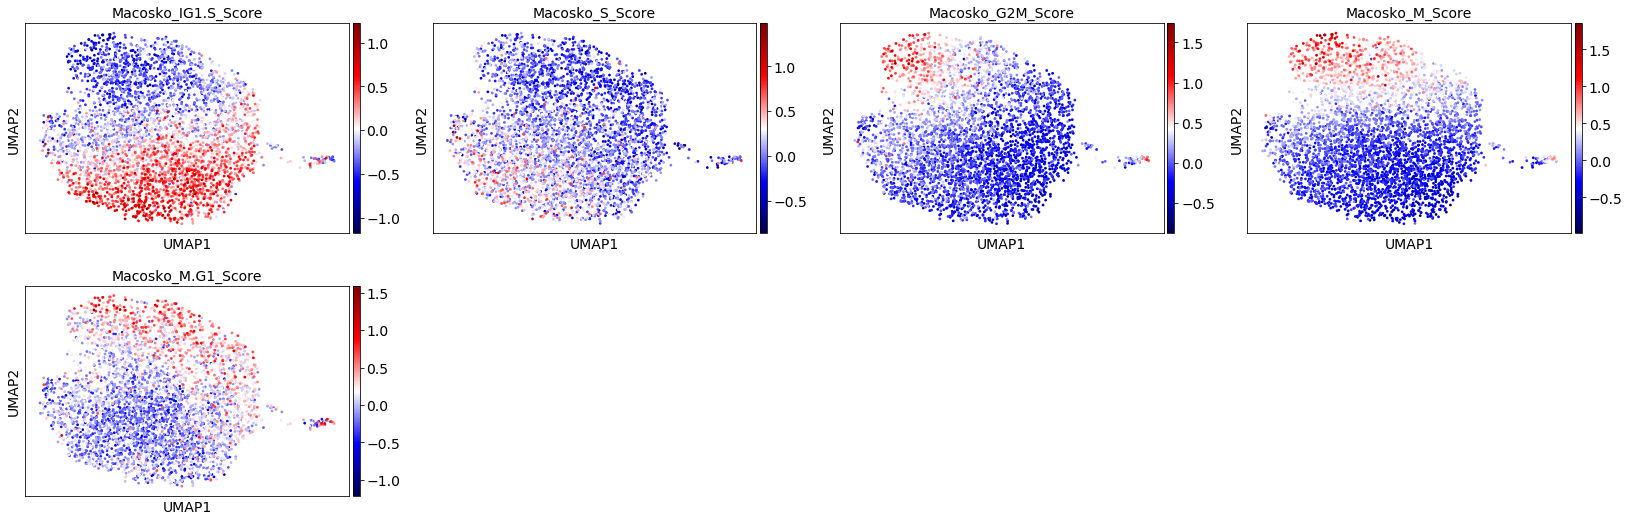

In [51]:
sc.pl.umap(adata_RPS2, color='Macosko_IG1.S_Score', cmap='seismic')
sc.pl.umap(adata_RPS2, color='Macosko_S_Score', cmap='seismic')
sc.pl.umap(adata_RPS2, color='Macosko_G2M_Score', cmap='seismic')
sc.pl.umap(adata_RPS2, color='Macosko_M_Score', cmap='seismic')
sc.pl.umap(adata_RPS2, color='Macosko_M.G1_Score', cmap='seismic')
sc.pl.umap(adata_RPS2, color=['Macosko_IG1.S_Score','Macosko_S_Score','Macosko_G2M_Score','Macosko_M_Score','Macosko_M.G1_Score'], cmap='seismic')
#sc.pl.umap(adata_RPS2, color=['lenti_common'], cmap='OrRd')

## Park et al Cell Cycle Genes (Top 100)

In [52]:
Park_cc_genes_file = '../Cell_Cycle_Tables/Park_expression_S_M_top100_genes.csv'

#Score cell cycle and visualize the effect:
Park_cc_genes = pd.read_csv(Park_cc_genes_file)
Park_cc_genes.head()

m/s top100 s/m top100
0       ABL2       AARS
1      ACSL4      ABCA7
2      ACTN1      ABHD4
3        AEN      ACAD8
4       AGO2      ADCK3

In [53]:
Park_cc_genes_file = '../Cell_Cycle_Tables/Park_expression_S_M_top100_genes.csv'

#Score cell cycle and visualize the effect:
Park_cc_genes = pd.read_csv(Park_cc_genes_file)
Park_s_genes = Park_cc_genes['s/m top100'].dropna()
Park_m_genes = Park_cc_genes['m/s top100'].dropna()

#s_genes_mm = [gene.lower().capitalize() for gene in s_genes]
#g2m_genes_mm = [gene.lower().capitalize() for gene in g2m_genes]

Park_s_genes_mm_ens = adata_RPS2.var_names[np.in1d(adata_RPS2.var_names, Park_s_genes)]
print('Park S Genes')
print(Park_s_genes_mm_ens)
Park_m_genes_mm_ens = adata_RPS2.var_names[np.in1d(adata_RPS2.var_names, Park_m_genes)]
print('Park M Genes')
print(Park_m_genes_mm_ens)

Park S Genes
Index(['RHOB', 'P4HTM', 'NR2F1', 'HIST1H1C', 'PNRC1', 'CDKN2B', 'GAS1',
       'IER5L', 'TUBB4B', 'DDIT4', 'ZNF503', 'GABARAPL1', 'TUBA1C', 'UNG',
       'UBC', 'PCK2', 'CARHSP1', 'QPRT', 'MCM5'],
      dtype='object')
Park M Genes
Index(['SFPQ', 'CDC20', 'JUN', 'DEPDC1', 'PSRC1', 'KIF14', 'CENPA', 'BUB1',
       'SGOL2', 'CENPE', 'CCNB1', 'PTTG1', 'HMMR', 'CKS2', 'PALM2-AKAP2',
       'AKAP2', 'MKI67', 'PHLDA2', 'CCND1', 'HSPA8', 'DLGAP5', 'KIF23', 'AEN',
       'PLK1', 'TPX2', 'AURKA', 'IL11', 'UBE2S', 'GTSE1', 'RUNX1'],
      dtype='object')


In [54]:
#Tried using genes from .raw to increase the number. This means that .score_genes function also needs to be ran with raw counts

Park_s_genes_mm_ens = adata_RPS2.raw.var_names[np.in1d(adata_RPS2.raw.var_names, Park_s_genes)]
print('Park S Genes')
print(Park_s_genes_mm_ens)
Park_m_genes_mm_ens = adata_RPS2.raw.var_names[np.in1d(adata_RPS2.raw.var_names, Park_m_genes)]
print('Park M Genes')
print(Park_m_genes_mm_ens)

Park S Genes
Index(['CCNL2', 'PIK3R3', 'ORC1', 'MOV10', 'TXNIP', 'SELENBP1', 'PBXIP1',
       'ZBTB7B', 'DISP1', 'ADCK3', 'RHOB', 'YPEL5', 'TUBA4A', 'P4HTM',
       'SLC12A8', 'MAGEF1', 'MXD4', 'AMACR', 'FBXO4', 'SSBP2', 'NR2F1',
       'HIST1H1C', 'KLC4', 'PNRC1', 'TMEM106B', 'HOXA11', 'PDK4', 'HBP1',
       'C7orf55', 'DPYSL2', 'C8orf4', 'JPH1', 'FBXO32', 'KLHL9', 'CDKN2B',
       'AQP3', 'GALT', 'FANCG', 'GAS1', 'IER5L', 'TUBB4B', 'DDIT4', 'ZNF503',
       'PDDC1', 'TMEM223', 'POLA2', 'CTSF', 'TCIRG1', 'FOLR1', 'CREBZF',
       'ACAD8', 'GABARAPL1', 'H2AFJ', 'SLC38A2', 'TUBA1B', 'TUBA1C', 'LETMD1',
       'NR4A1', 'STAT2', 'PRIM1', 'UNG', 'SETD1B', 'UBC', 'RAB20', 'TMEM55B',
       'ABHD4', 'PCK2', 'SDR39U1', 'SPTSSA', 'IRF2BPL', 'MOAP1', 'AHNAK2',
       'KIAA0101', 'C16orf59', 'ZNF500', 'CARHSP1', 'QPRT', 'AARS', 'CDT1',
       'PER1', 'SREBF1', 'SCRN2', 'MFSD11', 'CBX4', 'TYMS', 'CHMP1B', 'IMPA2',
       'CYB5A', 'NECAB3', 'DSN1', 'WISP2', 'CEBPB', 'ABCA7', 'SPC24', 'EID2',
     

In [55]:
sc.tl.score_genes(adata_RPS2,Park_s_genes_mm_ens,score_name='Park_S_Score')
sc.tl.score_genes(adata_RPS2,Park_s_genes_mm_ens,score_name='Park_S_Score_Raw',use_raw=True)
sc.tl.score_genes(adata_RPS2,Park_m_genes_mm_ens,score_name='Park_M_Score')
sc.tl.score_genes(adata_RPS2,Park_m_genes_mm_ens,score_name='Park_M_Score_Raw',use_raw=True)

computing score 'Park_S_Score'
    finished: added
    'Park_S_Score', score of gene set (adata.obs) (0:00:00)
computing score 'Park_S_Score_Raw'
    finished: added
    'Park_S_Score_Raw', score of gene set (adata.obs) (0:00:01)
computing score 'Park_M_Score'
    finished: added
    'Park_M_Score', score of gene set (adata.obs) (0:00:00)
computing score 'Park_M_Score_Raw'
    finished: added
    'Park_M_Score_Raw', score of gene set (adata.obs) (0:00:01)


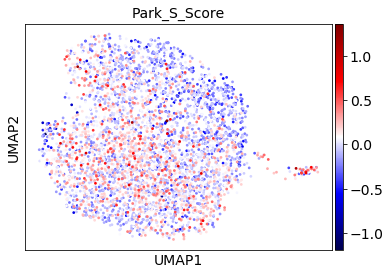

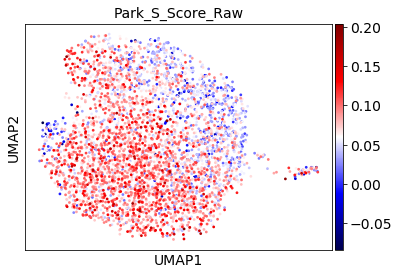

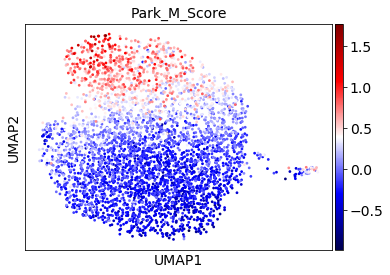

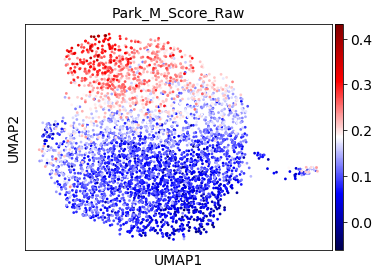

In [56]:
sc.pl.umap(adata_RPS2, color='Park_S_Score', cmap='seismic')
sc.pl.umap(adata_RPS2, color='Park_S_Score_Raw', cmap='seismic')
sc.pl.umap(adata_RPS2, color='Park_M_Score', cmap='seismic')
sc.pl.umap(adata_RPS2, color='Park_M_Score_Raw', cmap='seismic')

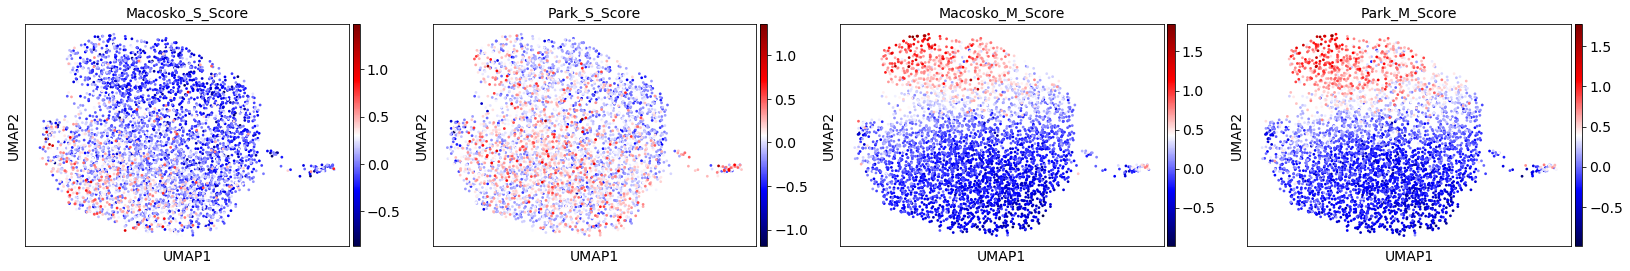

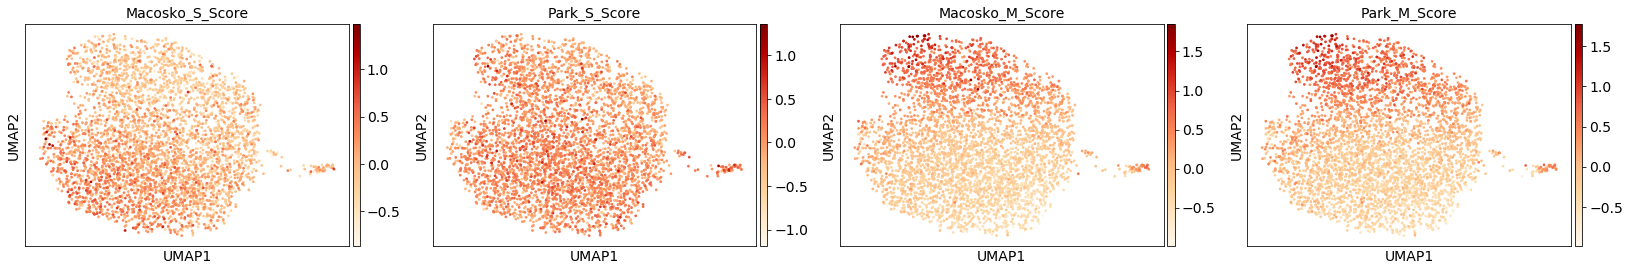

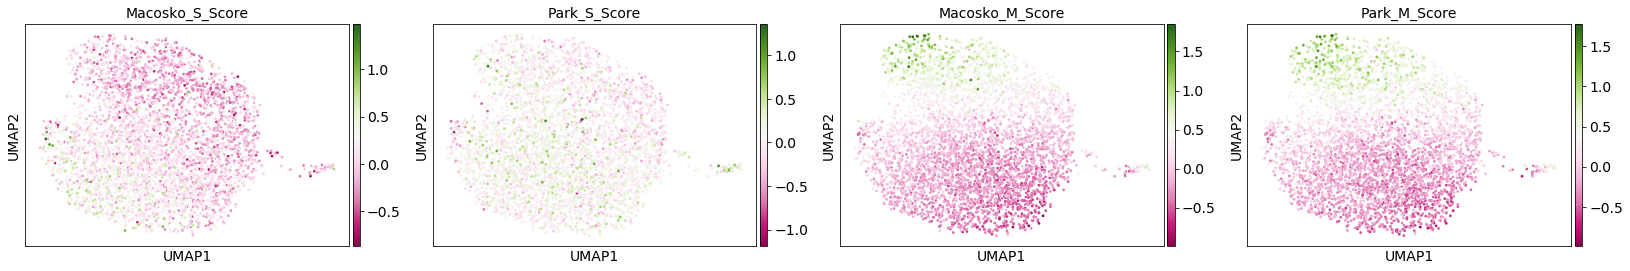

In [57]:
sc.pl.umap(adata_RPS2, color=['Macosko_S_Score','Park_S_Score','Macosko_M_Score','Park_M_Score'], cmap='seismic')
sc.pl.umap(adata_RPS2, color=['Macosko_S_Score','Park_S_Score','Macosko_M_Score','Park_M_Score'], cmap='OrRd')
sc.pl.umap(adata_RPS2, color=['Macosko_S_Score','Park_S_Score','Macosko_M_Score','Park_M_Score'], cmap='PiYG')

In [58]:
adata_RPS2.obs

n_genes  percent_mito  n_counts louvain louvain_r0.5  \
AAACCCACAGGATCTT-1     5209      0.061472   23523.0       2            2   
AAACCCACAGGTACGA-1     4466      0.093381   19458.0       4            1   
AAACCCAGTTCCGCAG-1     5601      0.057334   28831.0       4            1   
AAACCCATCCTAGCCT-1     6326      0.080142   34314.0       4            1   
AAACGAAAGGGATGTC-1     4588      0.093182   19800.0       4            1   
...                     ...           ...       ...     ...          ...   
TTTGTTGCACTAGGCC-1     2846      0.135862    7618.0       7            2   
TTTGTTGCATAGGTAA-1     3940      0.107398   15680.0       5            0   
TTTGTTGCATATCGGT-1     5075      0.085707   24117.0       6            3   
TTTGTTGGTACACTCA-1     6576      0.075234   41271.0       5            2   
TTTGTTGTCACTACTT-1     4205      0.059861   15987.0       0            0   

                   louvain_r0.2   S_score  G2M_score phase  \
AAACCCACAGGATCTT-1            0  0.081639   0.225844   G2M   
AAACCCACAGGTACGA-1            1 -0.478466  -0.160164    G1   
AAACCCAGTTCCGCAG-1            1 -0.671438   0.386993   G2M   
AAACCCATCCTAGCCT-1            1 -0.148146  -0.114277    G1   
AAACGAAAGGGATGTC-1            1 -0.432958   0.056781   G2M   
...                         ...       ...        ...   ...   
TTTGTTGCACTAGGCC-1            0  0.187004   0.013754     S   
TTTGTTGCATAGGTAA-1            0  0.562653   0.041267     S   
TTTGTTGCATATCGGT-1            1 -0.128561  -0.104576    G1   
TTTGTTGGTACACTCA-1            0  0.067106  -0.035719     S   
TTTGTTGTCACTACTT-1            0  0.057856  -0.074451     S   

                    Macosko_IG1.S_Score  Macosko_S_Score  Macosko_G2M_Score  \
AAACCCACAGGATCTT-1            -0.232545         0.064124           0.292101   
AAACCCACAGGTACGA-1            -0.045493        -0.226793          -0.113363   
AAACCCAGTTCCGCAG-1            -0.320069        -0.483018           0.381971   
AAACCCATCCTAGCCT-1            -0.140467        -0.236697          -0.093361   
AAACGAAAGGGATGTC-1            -0.397356        -0.396432           0.066581   
...                                 ...              ...                ...   
TTTGTTGCACTAGGCC-1             0.493975         0.294180          -0.224808   
TTTGTTGCATAGGTAA-1             0.335871         0.431848          -0.052278   
TTTGTTGCATATCGGT-1            -0.047373        -0.184542          -0.319969   
TTTGTTGGTACACTCA-1            -0.160328         0.169284          -0.039715   
TTTGTTGTCACTACTT-1             0.011583        -0.048463           0.126303   

                    Macosko_M_Score  Macosko_M.G1_Score  Park_S_Score  \
AAACCCACAGGATCTT-1        -0.152435           -0.276019      0.116773   
AAACCCACAGGTACGA-1         0.587820            0.118488     -0.461245   
AAACCCAGTTCCGCAG-1         0.422193            0.276402     -0.285249   
AAACCCATCCTAGCCT-1         0.021590            0.142474     -0.396053   
AAACGAAAGGGATGTC-1         0.147996            0.489337      0.101275   
...                             ...                 ...           ...   
TTTGTTGCACTAGGCC-1        -0.403362           -0.544589      0.243586   
TTTGTTGCATAGGTAA-1        -0.218793            0.058706     -0.060331   
TTTGTTGCATATCGGT-1         0.127239           -0.003492     -0.151823   
TTTGTTGGTACACTCA-1        -0.051270            0.070809     -0.201022   
TTTGTTGTCACTACTT-1        -0.013631            0.129850     -0.034335   

                    Park_S_Score_Raw  Park_M_Score  Park_M_Score_Raw  
AAACCCACAGGATCTT-1          0.080246     -0.192945          0.107485  
AAACCCACAGGTACGA-1          0.000674      0.491895          0.189813  
AAACCCAGTTCCGCAG-1          0.041492      0.558665          0.255038  
AAACCCATCCTAGCCT-1         -0.014025      0.076988          0.186759  
AAACGAAAGGGATGTC-1          0.051752      0.243416          0.117016  
...                              ...           ...               ...  
TTTGTTGCACTAGGCC-1          0.148095   

# Take top 100 scoring cells for each cell cycle category #
## Hopefully make a column with a "label" for each a la 'phase' ##

In [59]:
 adata_RPS2.obs[['phase','Macosko_IG1.S_Score',
 'Macosko_S_Score',
 'Macosko_G2M_Score',
 'Macosko_M_Score',
 'Macosko_M.G1_Score',
 'Park_S_Score',
 'Park_M_Score']].head()

phase  Macosko_IG1.S_Score  Macosko_S_Score  \
AAACCCACAGGATCTT-1   G2M            -0.232545         0.064124   
AAACCCACAGGTACGA-1    G1            -0.045493        -0.226793   
AAACCCAGTTCCGCAG-1   G2M            -0.320069        -0.483018   
AAACCCATCCTAGCCT-1    G1            -0.140467        -0.236697   
AAACGAAAGGGATGTC-1   G2M            -0.397356        -0.396432   

                    Macosko_G2M_Score  Macosko_M_Score  Macosko_M.G1_Score  \
AAACCCACAGGATCTT-1           0.292101        -0.152435           -0.276019   
AAACCCACAGGTACGA-1          -0.113363         0.587820            0.118488   
AAACCCAGTTCCGCAG-1           0.381971         0.422193            0.276402   
AAACCCATCCTAGCCT-1          -0.093361         0.021590            0.142474   
AAACGAAAGGGATGTC-1           0.066581         0.147996            0.489337   

                    Park_S_Score  Park_M_Score  
AAACCCACAGGATCTT-1      0.116773     -0.192945  
AAACCCACAGGTACGA-1     -0.461245      0.491895  
AAACCCAGTTCCGCAG-1     -0.285249      0.558665  
AAACCCATCCTAGCCT-1     -0.396053      0.076988  
AAACGAAAGGGATGTC-1      0.101275      0.243416

In [60]:
test= adata_RPS2.obs[['phase','Macosko_IG1.S_Score',
 'Macosko_S_Score',
 'Macosko_G2M_Score',
 'Macosko_M_Score',
 'Macosko_M.G1_Score',
 'Park_S_Score',
 'Park_M_Score']]
test[['Macosko_IG1.S_Score']].sort_values(by='Macosko_IG1.S_Score',ascending=False).head(100)
#test[test['Macosko_IG1.S_Score']]

Macosko_IG1.S_Score
AGTGATCGTGGCATCC-1             1.219717
CCTCCAAAGTACCCTA-1             1.206715
CTGAGGCTCCGATAAC-1             1.150543
ATAGGCTAGGCGTCCT-1             1.115964
TATCGCCGTCGACTGC-1             1.103444
...                                 ...
TGGATCACATCACGGC-1             0.738605
AACCTGACATTGCTTT-1             0.738366
AGCTACACACCAACAT-1             0.734220
CGAGTGCCAACGTTAC-1             0.734200
AGACCCGTCCAGCCTT-1             0.733988

[100 rows x 1 columns]

In [61]:
# Testing how to label when in more than one score

scores = adata_RPS2.obs[['phase','Macosko_IG1.S_Score','Macosko_S_Score','Macosko_G2M_Score','Macosko_M_Score','Macosko_M.G1_Score','Park_S_Score','Park_M_Score']]

# default phase is NA
phase = pd.Series('rest', index=scores.index)

# labels top 100 cells of each column
top=500

column='Macosko_S_Score'
subset1=scores[[column]].sort_values(by=column,ascending=False).head(top)
phase[phase.index.isin(subset1.index)] = 'M_S'

column='Park_S_Score'
subset2=scores[[column]].sort_values(by=column,ascending=False).head(top)
phase[phase.index.isin(subset2.index)] = 'P_S'

column='Macosko_M_Score'
subset3=scores[[column]].sort_values(by=column,ascending=False).head(top)
phase[phase.index.isin(subset3.index)] = 'M_M'

column='Park_M_Score'
subset4=scores[[column]].sort_values(by=column,ascending=False).head(top)
phase[phase.index.isin(subset4.index)] = 'P_M'

phase[phase.index.isin(subset1.index)&phase.index.isin(subset2.index)] = 'MP_S'

phase[phase.index.isin(subset3.index)&phase.index.isin(subset4.index)] = 'MP_M'

phase[phase.index.isin(subset1.index)&phase.index.isin(subset3.index)] = 'Multi_Phase'
phase[phase.index.isin(subset2.index)&phase.index.isin(subset4.index)] = 'Multi_Phase'

adata_RPS2.obs['Macosko_Park_Phase'] = phase

print(pd.DataFrame(phase)[0].value_counts())

rest           2489
M_S             408
P_S             363
MP_M            332
M_M             106
P_M             101
MP_S             73
Multi_Phase      73
Name: 0, dtype: int64


In [62]:
adata_RPS2

AnnData object with n_obs × n_vars = 3945 × 2000 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'louvain_r0.5', 'louvain_r0.2', 'S_score', 'G2M_score', 'phase', 'Macosko_IG1.S_Score', 'Macosko_S_Score', 'Macosko_G2M_Score', 'Macosko_M_Score', 'Macosko_M.G1_Score', 'Park_S_Score', 'Park_S_Score_Raw', 'Park_M_Score', 'Park_M_Score_Raw', 'Macosko_Park_Phase'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'louvain_r0.5_colors', 'louvain_r0.2_colors', 'rank_genes_groups', 'dendrogram_louvain', 'phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [63]:
adata_RPS2.obs

n_genes  percent_mito  n_counts louvain louvain_r0.5  \
AAACCCACAGGATCTT-1     5209      0.061472   23523.0       2            2   
AAACCCACAGGTACGA-1     4466      0.093381   19458.0       4            1   
AAACCCAGTTCCGCAG-1     5601      0.057334   28831.0       4            1   
AAACCCATCCTAGCCT-1     6326      0.080142   34314.0       4            1   
AAACGAAAGGGATGTC-1     4588      0.093182   19800.0       4            1   
...                     ...           ...       ...     ...          ...   
TTTGTTGCACTAGGCC-1     2846      0.135862    7618.0       7            2   
TTTGTTGCATAGGTAA-1     3940      0.107398   15680.0       5            0   
TTTGTTGCATATCGGT-1     5075      0.085707   24117.0       6            3   
TTTGTTGGTACACTCA-1     6576      0.075234   41271.0       5            2   
TTTGTTGTCACTACTT-1     4205      0.059861   15987.0       0            0   

                   louvain_r0.2   S_score  G2M_score phase  \
AAACCCACAGGATCTT-1            0  0.081639   0.225844   G2M   
AAACCCACAGGTACGA-1            1 -0.478466  -0.160164    G1   
AAACCCAGTTCCGCAG-1            1 -0.671438   0.386993   G2M   
AAACCCATCCTAGCCT-1            1 -0.148146  -0.114277    G1   
AAACGAAAGGGATGTC-1            1 -0.432958   0.056781   G2M   
...                         ...       ...        ...   ...   
TTTGTTGCACTAGGCC-1            0  0.187004   0.013754     S   
TTTGTTGCATAGGTAA-1            0  0.562653   0.041267     S   
TTTGTTGCATATCGGT-1            1 -0.128561  -0.104576    G1   
TTTGTTGGTACACTCA-1            0  0.067106  -0.035719     S   
TTTGTTGTCACTACTT-1            0  0.057856  -0.074451     S   

                    Macosko_IG1.S_Score  Macosko_S_Score  Macosko_G2M_Score  \
AAACCCACAGGATCTT-1            -0.232545         0.064124           0.292101   
AAACCCACAGGTACGA-1            -0.045493        -0.226793          -0.113363   
AAACCCAGTTCCGCAG-1            -0.320069        -0.483018           0.381971   
AAACCCATCCTAGCCT-1            -0.140467        -0.236697          -0.093361   
AAACGAAAGGGATGTC-1            -0.397356        -0.396432           0.066581   
...                                 ...              ...                ...   
TTTGTTGCACTAGGCC-1             0.493975         0.294180          -0.224808   
TTTGTTGCATAGGTAA-1             0.335871         0.431848          -0.052278   
TTTGTTGCATATCGGT-1            -0.047373        -0.184542          -0.319969   
TTTGTTGGTACACTCA-1            -0.160328         0.169284          -0.039715   
TTTGTTGTCACTACTT-1             0.011583        -0.048463           0.126303   

                    Macosko_M_Score  Macosko_M.G1_Score  Park_S_Score  \
AAACCCACAGGATCTT-1        -0.152435           -0.276019      0.116773   
AAACCCACAGGTACGA-1         0.587820            0.118488     -0.461245   
AAACCCAGTTCCGCAG-1         0.422193            0.276402     -0.285249   
AAACCCATCCTAGCCT-1         0.021590            0.142474     -0.396053   
AAACGAAAGGGATGTC-1         0.147996            0.489337      0.101275   
...                             ...                 ...           ...   
TTTGTTGCACTAGGCC-1        -0.403362           -0.544589      0.243586   
TTTGTTGCATAGGTAA-1        -0.218793            0.058706     -0.060331   
TTTGTTGCATATCGGT-1         0.127239           -0.003492     -0.151823   
TTTGTTGGTACACTCA-1        -0.051270            0.070809     -0.201022   
TTTGTTGTCACTACTT-1        -0.013631            0.129850     -0.034335   

                    Park_S_Score_Raw  Park_M_Score  Park_M_Score_Raw  \
AAACCCACAGGATCTT-1          0.080246     -0.192945          0.107485   
AAACCCACAGGTACGA-1          0.000674      0.491895          0.189813   
AAACCCAGTTCCGCAG-1          0.041492      0.558665          0.255038   
AAACCCATCCTAGCCT-1         -0.014025      0.076988          0.186759   
AAACGAAAGGGATGTC-1          0.051752      0.243416          0.117016   
...                              ...           ...               ...   
TTTGTTGCACTAGGCC-1          0.14

... storing 'Macosko_Park_Phase' as categorical


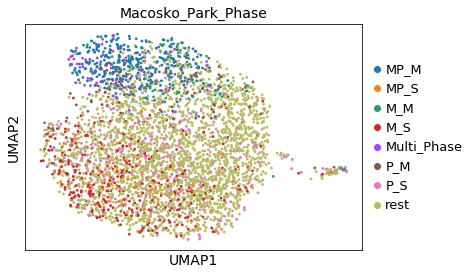

In [64]:
sc.pl.umap(adata_RPS2,color='Macosko_Park_Phase')

In [65]:
#Filter adata to remove all 'NAs' from 'Macosko_Park_Phase'
adata_RPS2_Phases=adata_RPS2[~adata_RPS2.obs['Macosko_Park_Phase'].isin(['rest']),:].copy()
adata_RPS2_Phases

AnnData object with n_obs × n_vars = 1456 × 2000 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'louvain_r0.5', 'louvain_r0.2', 'S_score', 'G2M_score', 'phase', 'Macosko_IG1.S_Score', 'Macosko_S_Score', 'Macosko_G2M_Score', 'Macosko_M_Score', 'Macosko_M.G1_Score', 'Park_S_Score', 'Park_S_Score_Raw', 'Park_M_Score', 'Park_M_Score_Raw', 'Macosko_Park_Phase'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'louvain_r0.5_colors', 'louvain_r0.2_colors', 'rank_genes_groups', 'dendrogram_louvain', 'phase_colors', 'Macosko_Park_Phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

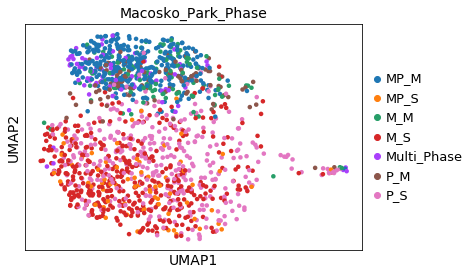

In [66]:
sc.pl.umap(adata_RPS2_Phases,color='Macosko_Park_Phase')

In [67]:
#by_phase_Macosko_Park.to_csv('/projects/ps-yeolab3/iachaim/10X/APOBEC/to_share/RPS2_by_phase_Macosko_Park_normalized_counts.csv')

# Layering edits/C louvain clusters on expression data # 

In [68]:
test=adata_RPS2.obs
final=pd.concat([test,subset['edits_louvain_r0_5'].astype(str)],axis=1,sort=True)
final=final.dropna()
#final['louvain_edits']=final['louvain_edits'].astype(str)
final

n_genes  percent_mito  n_counts louvain louvain_r0.5  \
AAACCCACAGGATCTT-1   5209.0      0.061472   23523.0       2            2   
AAACCCACAGGTACGA-1   4466.0      0.093381   19458.0       4            1   
AAACCCAGTTCCGCAG-1   5601.0      0.057334   28831.0       4            1   
AAACCCATCCTAGCCT-1   6326.0      0.080142   34314.0       4            1   
AAACGAAAGGGATGTC-1   4588.0      0.093182   19800.0       4            1   
...                     ...           ...       ...     ...          ...   
TTTGTTGCACTAGGCC-1   2846.0      0.135862    7618.0       7            2   
TTTGTTGCATAGGTAA-1   3940.0      0.107398   15680.0       5            0   
TTTGTTGCATATCGGT-1   5075.0      0.085707   24117.0       6            3   
TTTGTTGGTACACTCA-1   6576.0      0.075234   41271.0       5            2   
TTTGTTGTCACTACTT-1   4205.0      0.059861   15987.0       0            0   

                   louvain_r0.2   S_score  G2M_score phase  \
AAACCCACAGGATCTT-1            0  0.081639   0.225844   G2M   
AAACCCACAGGTACGA-1            1 -0.478466  -0.160164    G1   
AAACCCAGTTCCGCAG-1            1 -0.671438   0.386993   G2M   
AAACCCATCCTAGCCT-1            1 -0.148146  -0.114277    G1   
AAACGAAAGGGATGTC-1            1 -0.432958   0.056781   G2M   
...                         ...       ...        ...   ...   
TTTGTTGCACTAGGCC-1            0  0.187004   0.013754     S   
TTTGTTGCATAGGTAA-1            0  0.562653   0.041267     S   
TTTGTTGCATATCGGT-1            1 -0.128561  -0.104576    G1   
TTTGTTGGTACACTCA-1            0  0.067106  -0.035719     S   
TTTGTTGTCACTACTT-1            0  0.057856  -0.074451     S   

                    Macosko_IG1.S_Score  Macosko_S_Score  Macosko_G2M_Score  \
AAACCCACAGGATCTT-1            -0.232545         0.064124           0.292101   
AAACCCACAGGTACGA-1            -0.045493        -0.226793          -0.113363   
AAACCCAGTTCCGCAG-1            -0.320069        -0.483018           0.381971   
AAACCCATCCTAGCCT-1            -0.140467        -0.236697          -0.093361   
AAACGAAAGGGATGTC-1            -0.397356        -0.396432           0.066581   
...                                 ...              ...                ...   
TTTGTTGCACTAGGCC-1             0.493975         0.294180          -0.224808   
TTTGTTGCATAGGTAA-1             0.335871         0.431848          -0.052278   
TTTGTTGCATATCGGT-1            -0.047373        -0.184542          -0.319969   
TTTGTTGGTACACTCA-1            -0.160328         0.169284          -0.039715   
TTTGTTGTCACTACTT-1             0.011583        -0.048463           0.126303   

                    Macosko_M_Score  Macosko_M.G1_Score  Park_S_Score  \
AAACCCACAGGATCTT-1        -0.152435           -0.276019      0.116773   
AAACCCACAGGTACGA-1         0.587820            0.118488     -0.461245   
AAACCCAGTTCCGCAG-1         0.422193            0.276402     -0.285249   
AAACCCATCCTAGCCT-1         0.021590            0.142474     -0.396053   
AAACGAAAGGGATGTC-1         0.147996            0.489337      0.101275   
...                             ...                 ...           ...   
TTTGTTGCACTAGGCC-1        -0.403362           -0.544589      0.243586   
TTTGTTGCATAGGTAA-1        -0.218793            0.058706     -0.060331   
TTTGTTGCATATCGGT-1         0.127239           -0.003492     -0.151823   
TTTGTTGGTACACTCA-1        -0.051270            0.070809     -0.201022   
TTTGTTGTCACTACTT-1        -0.013631            0.129850     -0.034335   

                    Park_S_Score_Raw  Park_M_Score  Park_M_Score_Raw  \
AAACCCACAGGATCTT-1          0.080246     -0.192945          0.107485   
AAACCCACAGGTACGA-1          0.000674      0.491895          0.189813   
AAACCCAGTTCCGCAG-1          0.041492      0.558665          0.255038   
AAACCCATCCTAGCCT-1         -0.014025      0.076988          0.186759   
AAACGAAAGGGATGTC-1          0.051752      0.243416          0.117016   
...                              ...           ...               ...   
TTTGTTGCACTAGGCC-1          0.14

In [69]:
adata_RPS2.obs=final

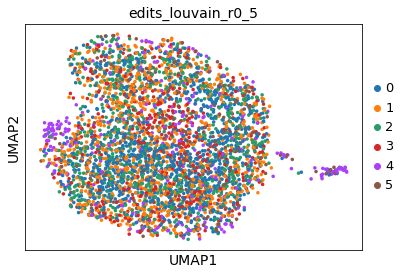

In [76]:
sc.pl.umap(adata_RPS2,color='edits_louvain_r0_5', size=50)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:08)


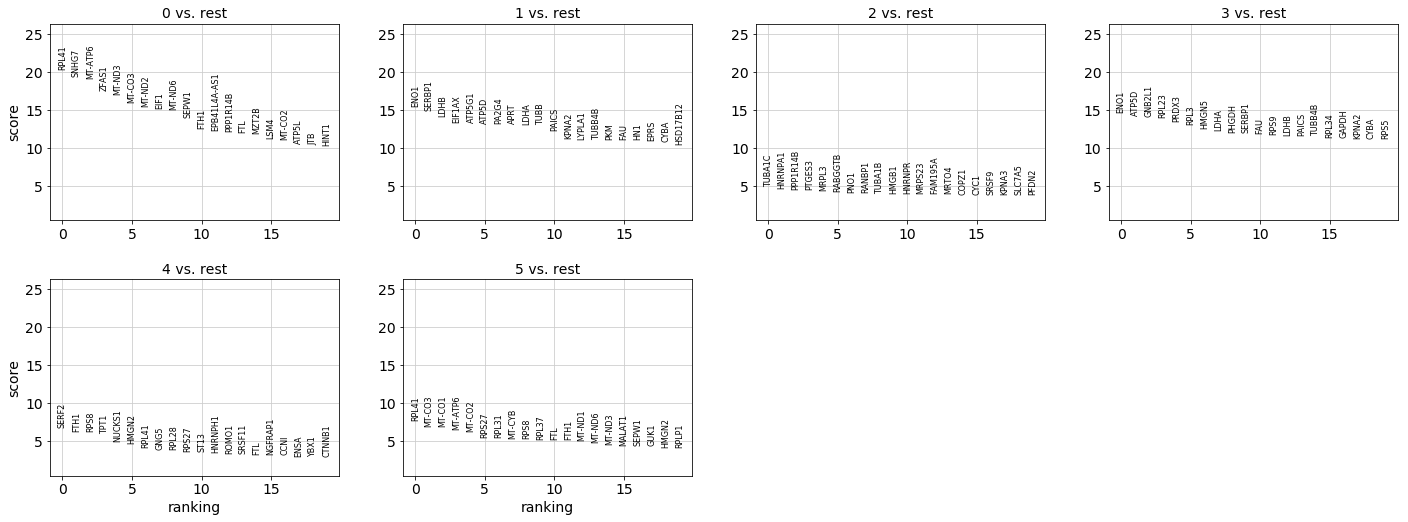

/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/anndata/core/anndata.py:299: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


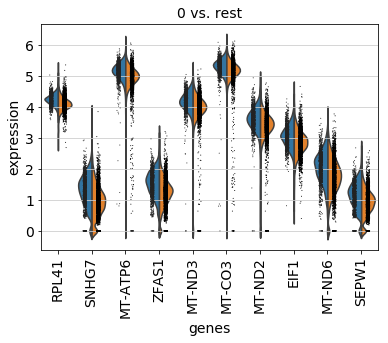

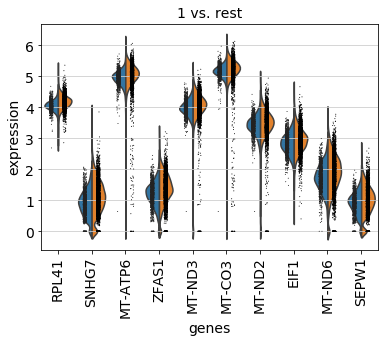

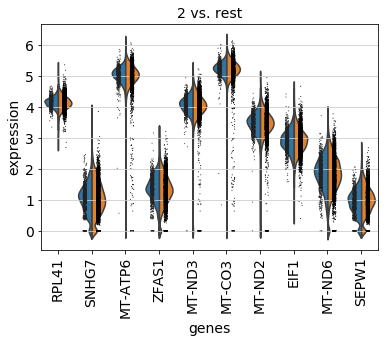

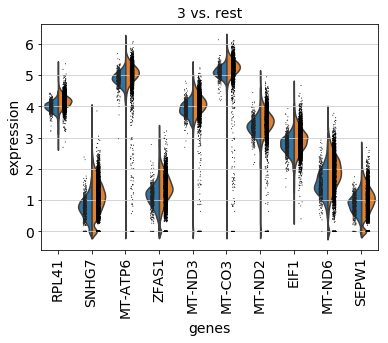

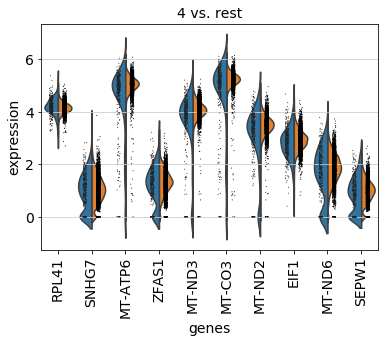

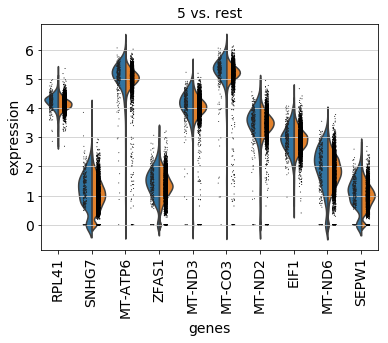

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_edits_louvain_r0_5']`


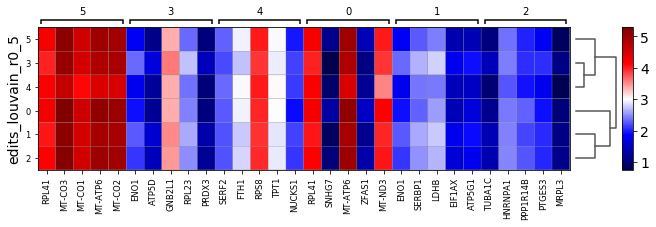

In [72]:
sc.tl.rank_genes_groups(adata_RPS2, 'edits_louvain_r0_5', method='wilcoxon',n_genes=100)
sc.pl.rank_genes_groups(adata_RPS2, n_genes=20)
sc.pl.rank_genes_groups_violin(adata_RPS2, n_genes=10)
sc.pl.rank_genes_groups_matrixplot(adata_RPS2, n_genes=5, cmap='seismic')

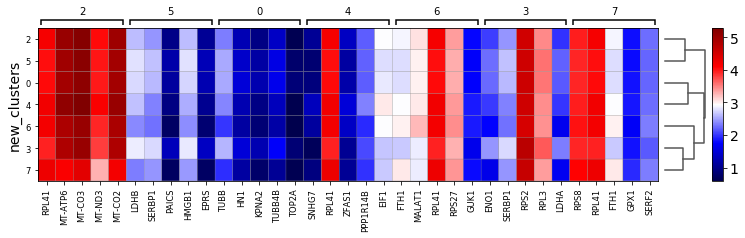

In [71]:
#sc.pl.rank_genes_groups_matrixplot(adata_RPS2, n_genes=5, cmap='seismic', use_raw=False)
sc.pl.rank_genes_groups_matrixplot(adata_RPS2, n_genes=5, cmap='seismic')

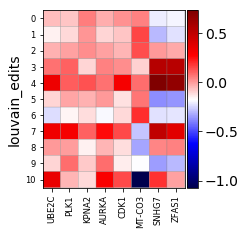

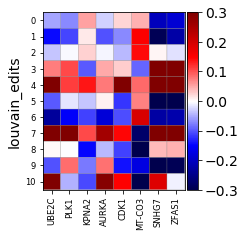

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[2.56, 0, 0.2])

In [52]:
gene_list=['UBE2C','PLK1','KPNA2','AURKA','CDK1','MT-CO3','SNHG7','ZFAS1']
sc.pl.matrixplot(adata_RPS2_with_edits,groupby='louvain_edits',
                 var_names=gene_list,
                cmap='seismic', use_raw=False)
sc.pl.matrixplot(adata_RPS2_with_edits,groupby='louvain_edits',
                 var_names=gene_list,
                cmap='seismic', use_raw=False, vmin=-0.3, vmax=0.3)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


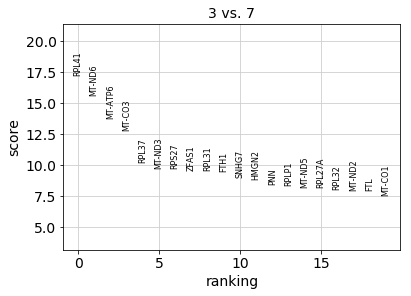

/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/anndata/core/anndata.py:299: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


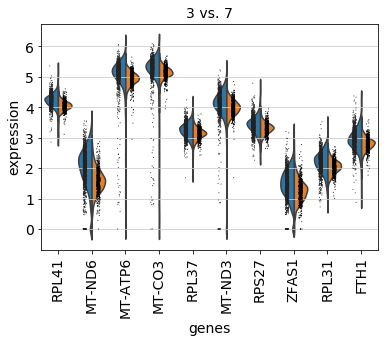

categories: 0, 1, 2, etc.
var_group_labels: 3


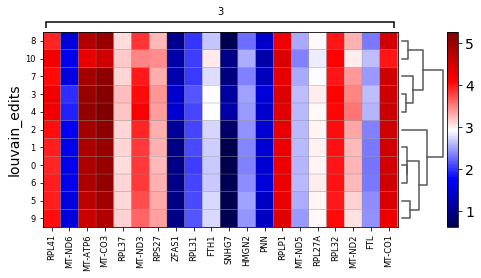

In [53]:
sc.tl.rank_genes_groups(adata_RPS2_with_edits, 'louvain_edits', method='wilcoxon',n_genes=100, groups=['3'], reference='7')
sc.pl.rank_genes_groups(adata_RPS2_with_edits, groups=['3'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata_RPS2_with_edits, groups='3', n_genes=10)
sc.pl.rank_genes_groups_matrixplot(adata_RPS2_with_edits, groups='3', n_genes=20, cmap='seismic')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


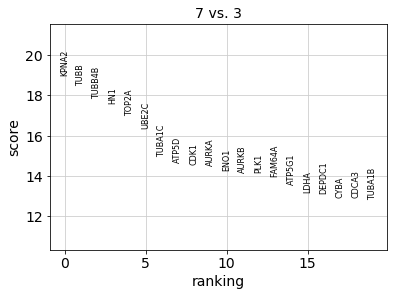

/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/anndata/core/anndata.py:299: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


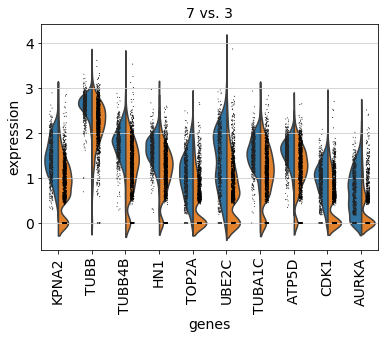

categories: 0, 1, 2, etc.
var_group_labels: 7


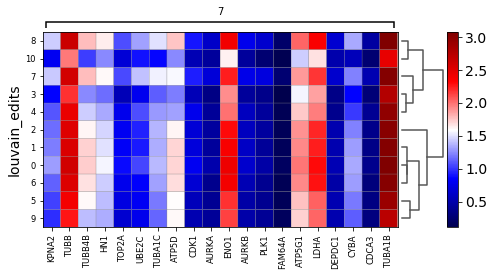

In [54]:
sc.tl.rank_genes_groups(adata_RPS2_with_edits, 'louvain_edits', method='wilcoxon',n_genes=100, groups=['7'], reference='3')
sc.pl.rank_genes_groups(adata_RPS2_with_edits, groups=['7'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata_RPS2_with_edits, groups='7', n_genes=10)
sc.pl.rank_genes_groups_matrixplot(adata_RPS2_with_edits, groups='7', n_genes=20, cmap='seismic')

In [55]:
final=adata_RPS2_with_edits.obs[adata_RPS2_with_edits.obs['louvain_edits'].isin(['3','7'])]
barcodes=final.index.values.tolist()
adata_RPS2_with_edits_3_7=adata_RPS2_with_edits[barcodes].copy()
adata_RPS2_with_edits_3_7.obs=final
adata_RPS2_with_edits_3_7
#adata_RPS2_with_edits.obs['louvain_edits'][adata_RPS2_with_edits.obs['louvain_edits']==['3']or==['7']]

AnnData object with n_obs × n_vars = 1600 × 2000 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain_edits'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'phase_colors', 'louvain_edits_colors', 'rank_genes_groups', 'dendrogram_louvain_edits'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

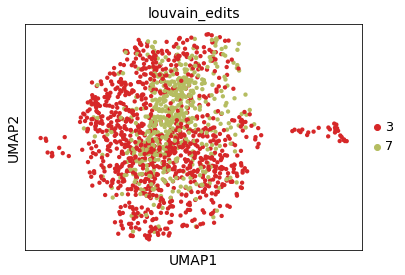

In [56]:
sc.pl.umap(adata_RPS2_with_edits_3_7,color='louvain_edits',groups=['3','7'])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


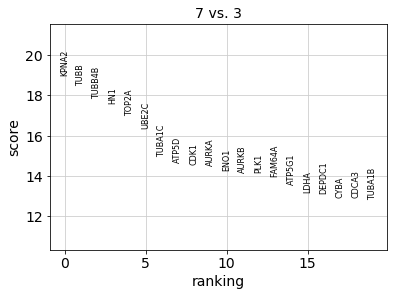

/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/anndata/core/anndata.py:299: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


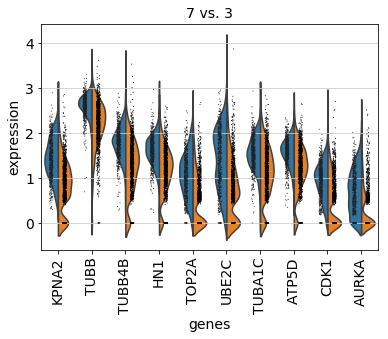

categories: 0, 1, 2, etc.
var_group_labels: 7


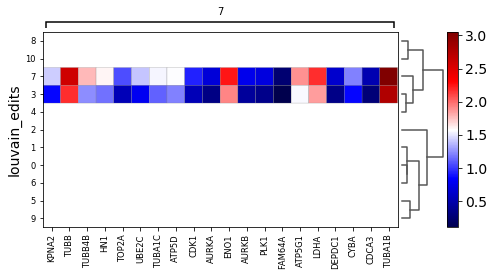

In [57]:
sc.tl.rank_genes_groups(adata_RPS2_with_edits_3_7, 'louvain_edits', method='wilcoxon',n_genes=100, groups=['7'], reference='3')
sc.pl.rank_genes_groups(adata_RPS2_with_edits_3_7, groups=['7'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata_RPS2_with_edits_3_7, groups='7', n_genes=10)
sc.pl.rank_genes_groups_matrixplot(adata_RPS2_with_edits_3_7, groups='7', n_genes=20, cmap='seismic')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


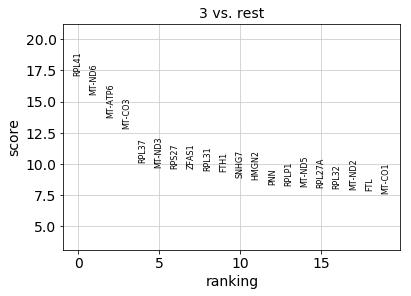

/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/anndata/core/anndata.py:299: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


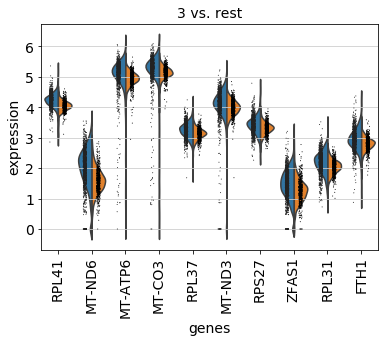

categories: 0, 1, 2, etc.
var_group_labels: 3


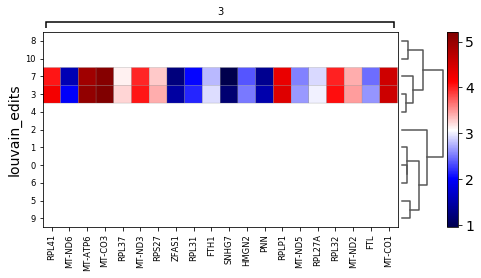

In [58]:
sc.tl.rank_genes_groups(adata_RPS2_with_edits_3_7, 'louvain_edits', method='wilcoxon',n_genes=100, groups=['3'])
sc.pl.rank_genes_groups(adata_RPS2_with_edits_3_7, groups=['3'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata_RPS2_with_edits_3_7, groups='3', n_genes=10)
sc.pl.rank_genes_groups_matrixplot(adata_RPS2_with_edits_3_7, groups='3', n_genes=20, cmap='seismic')

In [59]:
adata_RPS2_with_edits_3_7

AnnData object with n_obs × n_vars = 1600 × 2000 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain_edits'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'phase_colors', 'louvain_edits_colors', 'rank_genes_groups', 'dendrogram_louvain_edits'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

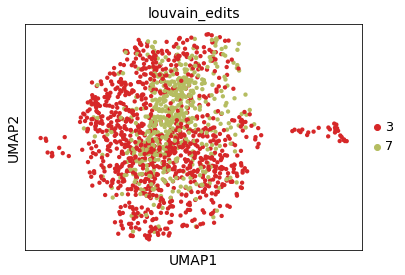

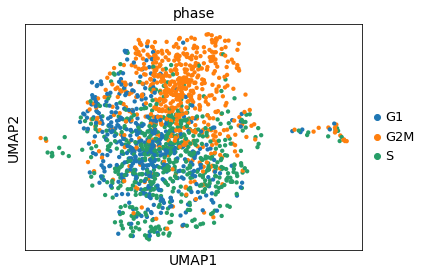

In [60]:
sc.pl.umap(adata_RPS2_with_edits_3_7,color='louvain_edits',groups=['3','7'])
sc.pl.umap(adata_RPS2_with_edits_3_7,color='phase')

In [61]:
adata_test=adata_RPS2_with_edits_3_7.obs
df = pd.DataFrame()
cols = list()
for i in set(adata_test['phase']):
    temp=adata_test[adata_test['phase']==str(i)]['louvain_edits'].value_counts()
    df = pd.concat((df,temp),axis=1)
    cols.append(i)
df.columns = cols
df

S   G1  G2M
3   393  308  336
7   178  116  269
10    0    0    0
9     0    0    0
8     0    0    0
6     0    0    0
5     0    0    0
4     0    0    0
2     0    0    0
1     0    0    0
0     0    0    0

In [62]:
# by sample
for i in df.index:
    df.loc[i] = df.loc[i].div(df.loc[i].sum())
adata_phase_by_sample=df
adata_phase_by_sample=adata_phase_by_sample.dropna()
adata_phase_by_sample

S        G1       G2M
3  0.378978  0.297011  0.324012
7  0.316163  0.206039  0.477798

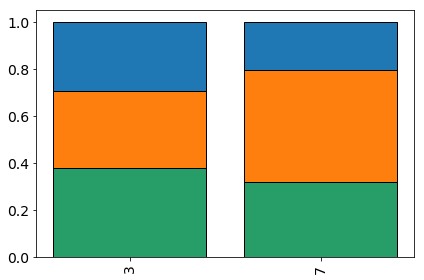

In [63]:
colors_phase={'G1':'#1f77b4', 'S':'#279e68', 'G2M':'#ff7f0e'}

sample_order=['3','7']
samples=adata_phase_by_sample
color_combo=colors_phase

bars = np.add(samples['S'],samples['G2M']).tolist()

plt.bar(sample_order,samples['S'],color=color_combo['S'],edgecolor='black')
plt.bar(sample_order,samples['G2M'],bottom=samples['S'],color=colors_phase['G2M'],edgecolor='black')
plt.bar(sample_order,samples['G1'],bottom=bars,color=colors_phase['G1'],edgecolor='black')

plt.grid(False)
plt.xticks(rotation=90)
plt.ylim(0,1.05)
plt.tight_layout()

# Layering Park Translation calls on expression data # 

In [64]:
Park_translation_edits=pd.read_csv('/projects/ps-yeolab3/iachaim/10X/APOBEC/to_share/RPS2_Park_translation_edits.csv',index_col=0)
Park_translation_edits

translation
index                         
AAACCCACAGGATCTT-1         NaN
AAACCCACAGGTACGA-1         NaN
AAACCCACAGTTCACA-1         NaN
AAACCCACATCGGATT-1         NaN
AAACCCAGTTCCGCAG-1         NaN
...                        ...
TTTGTTGTCAAACGTC-1         NaN
TTTGTTGTCACTACTT-1         NaN
TTTGTTGTCCCAGTGG-1         NaN
TTTGTTGTCTACCACC-1        S_UP
TTTGTTGTCTGGAAGG-1         NaN

[10238 rows x 1 columns]

In [65]:
Park_translation_edits['translation']=='S_UP'

index
AAACCCACAGGATCTT-1    False
AAACCCACAGGTACGA-1    False
AAACCCACAGTTCACA-1    False
AAACCCACATCGGATT-1    False
AAACCCAGTTCCGCAG-1    False
                      ...  
TTTGTTGTCAAACGTC-1    False
TTTGTTGTCACTACTT-1    False
TTTGTTGTCCCAGTGG-1    False
TTTGTTGTCTACCACC-1     True
TTTGTTGTCTGGAAGG-1    False
Name: translation, Length: 10238, dtype: bool

In [66]:
test=adata_RPS2.obs
final=pd.concat([test,Park_translation_edits['translation'].astype(str)],axis=1,sort=True)
final=final.dropna()
final

n_genes  percent_mito  n_counts   S_score  G2M_score  \
AAACCCACAGGATCTT-1   5209.0      0.061472   23523.0  0.296813   0.260917   
AAACCCACAGGTACGA-1   4466.0      0.093381   19458.0 -0.080177  -0.281111   
AAACCCACAGTTCACA-1   4898.0      0.077979   22365.0  0.089864  -0.446060   
AAACCCACATCGGATT-1   4998.0      0.096007   23290.0  0.002697   0.025023   
AAACCCAGTTCCGCAG-1   5601.0      0.057334   28831.0 -0.763700   0.619867   
...                     ...           ...       ...       ...        ...   
TTTGTTGTCAAACGTC-1   4039.0      0.067327   15150.0 -0.176983   0.081738   
TTTGTTGTCACTACTT-1   4205.0      0.059861   15987.0  0.179631  -0.057860   
TTTGTTGTCCCAGTGG-1   5012.0      0.075586   22782.0 -0.185714  -0.384960   
TTTGTTGTCTACCACC-1   6401.0      0.035312   32425.0  0.204058   0.398705   
TTTGTTGTCTGGAAGG-1   5578.0      0.043802   26346.0 -0.164800   0.340311   

                   phase translation  
AAACCCACAGGATCTT-1     S         nan  
AAACCCACAGGTACGA-1    G1         nan  
AAACCCACAGTTCACA-1     S         nan  
AAACCCACATCGGATT-1   G2M         nan  
AAACCCAGTTCCGCAG-1   G2M         nan  
...                  ...         ...  
TTTGTTGTCAAACGTC-1   G2M         nan  
TTTGTTGTCACTACTT-1     S         nan  
TTTGTTGTCCCAGTGG-1    G1         nan  
TTTGTTGTCTACCACC-1   G2M        S_UP  
TTTGTTGTCTGGAAGG-1   G2M         nan  

[10038 rows x 7 columns]

In [67]:
barcodes=final.index.values.tolist()
adata_RPS2_translation_edits=adata_RPS2[barcodes].copy()
adata_RPS2_translation_edits.obs=final
adata_RPS2_translation_edits

AnnData object with n_obs × n_vars = 10038 × 2000 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'translation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

... storing 'translation' as categorical


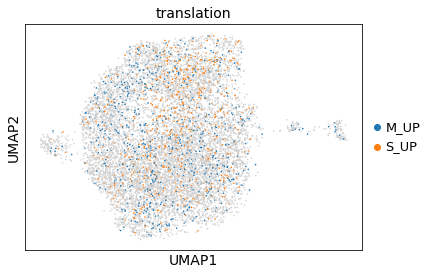

In [68]:
sc.pl.umap(adata_RPS2_translation_edits,color='translation',groups=['M_UP','S_UP'], size=10)

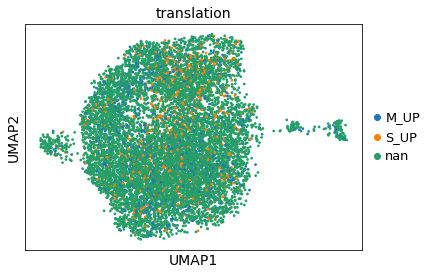

In [69]:
sc.pl.umap(adata_RPS2_translation_edits,color='translation', size=30)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


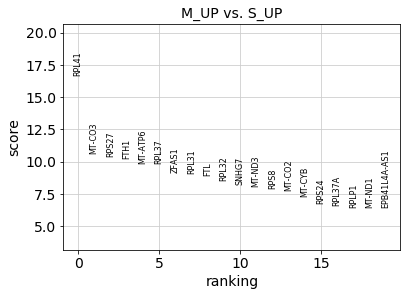

/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/anndata/core/anndata.py:299: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


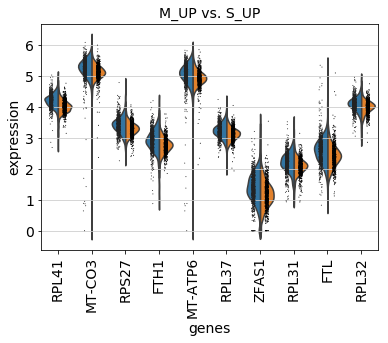

ValueError: no field of name M

In [70]:
sc.tl.rank_genes_groups(adata_RPS2_translation_edits, 'translation', method='wilcoxon',n_genes=100, groups=['M_UP'], reference='S_UP')
sc.pl.rank_genes_groups(adata_RPS2_translation_edits, groups=['M_UP'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata_RPS2_translation_edits, groups='M_UP', n_genes=10)
sc.pl.rank_genes_groups_matrixplot(adata_RPS2_translation_edits, groups='M_UP', n_genes=20, cmap='seismic')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


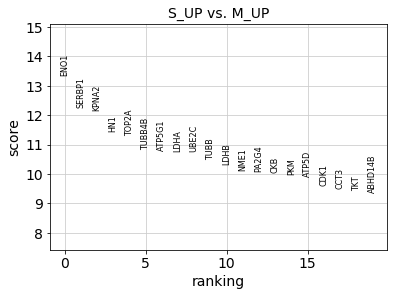

/home/iachaim/anaconda3/envs/scanpy/lib/python3.7/site-packages/anndata/core/anndata.py:299: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


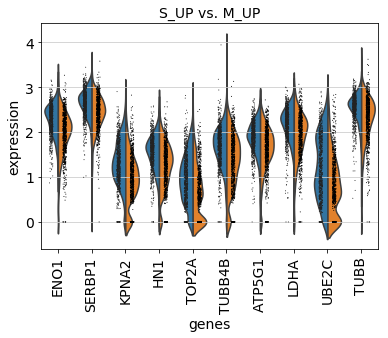

ValueError: no field of name S

In [71]:
sc.tl.rank_genes_groups(adata_RPS2_translation_edits, 'translation', method='wilcoxon',n_genes=100, groups=['S_UP'], reference='M_UP')
sc.pl.rank_genes_groups(adata_RPS2_translation_edits, groups=['S_UP'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata_RPS2_translation_edits, groups='S_UP', n_genes=10)
sc.pl.rank_genes_groups_matrixplot(adata_RPS2_translation_edits, groups='S_UP', n_genes=20, cmap='seismic')

In [72]:
final=adata_RPS2_translation_edits.obs[adata_RPS2_translation_edits.obs['translation'].isin(['M_UP','S_UP'])]
barcodes=final.index.values.tolist()
adata_RPS2_translation_edits_only=adata_RPS2_translation_edits[barcodes].copy()
adata_RPS2_translation_edits_only.obs=final
adata_RPS2_translation_edits_only
#adata_RPS2_with_edits.obs['louvain_edits'][adata_RPS2_with_edits.obs['louvain_edits']==['3']or==['7']]

AnnData object with n_obs × n_vars = 1495 × 2000 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'translation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'phase_colors', 'translation_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

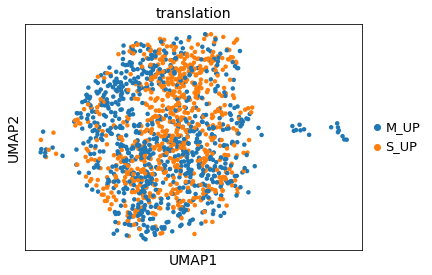

In [73]:
sc.pl.umap(adata_RPS2_translation_edits_only,color='translation',groups=['M_UP','S_UP'])